In [1]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
import random
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15425 non-null  int64  
 1   index           15425 non-null  int64  
 2   review          15425 non-null  float64
 3   text            15425 non-null  object 
 4   review_year     15425 non-null  int64  
 5   publisher       15425 non-null  object 
 6   categories      15425 non-null  object 
 7   published_year  15425 non-null  int64  
 8   helpfulness     15425 non-null  float64
 9   num_row         15425 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ MB


In [3]:
df_rating_books_processed = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [4]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15425 non-null  int64  
 1   num_row             15425 non-null  int64  
 2   text_clean          15425 non-null  object 
 3   compound_sentiment  15425 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 482.2+ KB


In [5]:
df_vader_sentiment_processed = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment_processed.sample()

,num_row,text_clean,compound_sentiment
14491,14491,heart darkness public domain status means anyo...,0.1849


In [6]:
df_all_data_processed = df_rating_books_processed.merge(df_vader_sentiment_processed, on='num_row', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15425 non-null  int64  
 1   review              15425 non-null  float64
 2   text                15425 non-null  object 
 3   review_year         15425 non-null  int64  
 4   publisher           15425 non-null  object 
 5   categories          15425 non-null  object 
 6   published_year      15425 non-null  int64  
 7   helpfulness         15425 non-null  float64
 8   num_row             15425 non-null  int64  
 9   text_clean          15425 non-null  object 
 10  compound_sentiment  15425 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.3+ MB


In [7]:
#Original Text is removed as clean text is added
df_all_data_processed = df_all_data_processed.drop(['text'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15425 non-null  int64  
 1   review              15425 non-null  float64
 2   review_year         15425 non-null  int64  
 3   publisher           15425 non-null  object 
 4   categories          15425 non-null  object 
 5   published_year      15425 non-null  int64  
 6   helpfulness         15425 non-null  float64
 7   num_row             15425 non-null  int64  
 8   text_clean          15425 non-null  object 
 9   compound_sentiment  15425 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.2+ MB


In [8]:
df_all_data_processed = df_all_data_processed.drop(['index'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15425 non-null  float64
 1   review_year         15425 non-null  int64  
 2   publisher           15425 non-null  object 
 3   categories          15425 non-null  object 
 4   published_year      15425 non-null  int64  
 5   helpfulness         15425 non-null  float64
 6   num_row             15425 non-null  int64  
 7   text_clean          15425 non-null  object 
 8   compound_sentiment  15425 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.1+ MB


In [9]:
df_all_data_processed = df_all_data_processed.drop(['num_row'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15425 non-null  float64
 1   review_year         15425 non-null  int64  
 2   publisher           15425 non-null  object 
 3   categories          15425 non-null  object 
 4   published_year      15425 non-null  int64  
 5   helpfulness         15425 non-null  float64
 6   text_clean          15425 non-null  object 
 7   compound_sentiment  15425 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 964.2+ KB


In [10]:
df_all_data_processed.sample(10)

,review,review_year,publisher,categories,published_year,helpfulness,text_clean,compound_sentiment
10239,1.0,2011,Other,Other,2010,1.000000,bought following books time ultimate jewelers ...,0.8948
7888,3.0,2010,Other,Fiction,2005,1.000000,im definitely cheating entering review ive fin...,0.8173
13276,4.0,2012,Other,Religion,2007,1.000000,joann ross great story teller gives detailed e...,0.9274
9223,3.0,2012,Other,Other,2008,1.000000,text covers lot worthwhile material easy under...,0.7506
6362,5.0,2010,Other,Other,2007,0.313725,review lord rings half century since publicati...,0.9430
13472,4.0,2011,Other,Fiction,2009,1.000000,differs great deal movies probably movies amal...,0.9468
12194,4.0,2013,Houghton Mifflin Harcourt,Fiction,2002,1.000000,beautifully written bit long windedit takes ge...,0.6808
1597,5.0,2013,Other,Fiction,1998,1.000000,great series talking greatest bounty hunter ti...,0.9273
13646,5.0,2013,Other,Juvenile Fiction,2013,1.000000,little book gives perspective mary sons passio...,0.8519
14338,5.0,2011,Other,Other,2002,1.000000,keith rosenkranz intended convey like toggle f...,0.9100


In [11]:
# def custom_string_to_list(s):
#     if isinstance(s, str):
#         return [item.strip(" '[]") for item in s.split(',')]
#     else:
#         return s

In [12]:
# df_all_data_processed['categories'] = df_all_data_processed['categories'].apply(custom_string_to_list)

In [13]:
ordered_columns = ['categories', 'publisher', 'published_year', 'review_year', 'helpfulness', 'text_clean','compound_sentiment', 'review']

In [14]:
df_all_data_processed = df_all_data_processed[ordered_columns]

In [15]:
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   categories          15425 non-null  object 
 1   publisher           15425 non-null  object 
 2   published_year      15425 non-null  int64  
 3   review_year         15425 non-null  int64  
 4   helpfulness         15425 non-null  float64
 5   text_clean          15425 non-null  object 
 6   compound_sentiment  15425 non-null  float64
 7   review              15425 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 964.2+ KB


In [16]:
df_all_data_processed.sample(10)

,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
8148,Business & Economics,Other,2009,2012,1.00,assigned book part masters degree course witho...,0.9424,4.0
7952,Other,Harper Collins,2009,2011,1.00,book instrumental moving long lasting grief de...,-0.6815,5.0
8657,Fiction,Other,2011,2012,1.00,entertaining gripping thought provokinghave en...,0.8834,5.0
15285,Other,Other,2012,2012,1.00,really wish book written higher reading level ...,0.9708,4.0
6593,Fiction,Harper Collins,2009,2012,1.00,could put book down jodi picoult way telling s...,0.3182,4.0
8201,Fiction,Other,2004,2013,1.00,good book hard find stopping place wanted kee...,0.2263,3.0
12986,Juvenile Fiction,Mariner Books,2012,2013,1.00,say? loved book past years grew hobbit little...,0.9231,5.0
5783,Other,Other,1996,2011,1.00,clever adaptation classic flaps added interest...,0.8271,5.0
1273,Religion,Other,2013,2013,1.00,using bible study group ladies stretching thou...,-0.2023,5.0
10352,Fiction,Other,2009,2012,0.25,although central idea book quite nice mr card ...,-0.8560,1.0


In [17]:
df_final = df_all_data_processed.copy()
df_final.to_csv('../data/final/df_final.csv')

# Train Test Split


In [18]:
#Divide Data Set into Train Test Datasets
X = df_final.copy().drop(['review'], axis=1)
y = df_final['review'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1530) #stratify: para definir los datasets de forma proporcional acorde a y.

X_train.sample(5)

,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment
13899,Biography & Autobiography,Other,2002,2013,1.0,read books sacajawea alot leave standing sure ...,-0.1531
2792,History,Penguin,2006,2010,1.0,middle volume nazi trilogy part way power par...,0.9689
3625,Biography & Autobiography,Other,2007,2012,1.0,rock star autobiographies generally share simi...,0.9933
13985,Other,Other,2000,2011,1.0,digital version free quite good table contents...,0.6880
10429,Business & Economics,Other,2010,2010,1.0,cant say enough the five dysfunctions team sup...,0.5106


In [19]:
df_train = X_train.copy()
df_train['review'] = y.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 5874 to 12059
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   categories          11568 non-null  object 
 1   publisher           11568 non-null  object 
 2   published_year      11568 non-null  int64  
 3   review_year         11568 non-null  int64  
 4   helpfulness         11568 non-null  float64
 5   text_clean          11568 non-null  object 
 6   compound_sentiment  11568 non-null  float64
 7   review              11568 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 813.4+ KB


# Analysis and EDA for target feature

In [20]:
df_train['review'].value_counts()

review
5.0    7074
4.0    2269
3.0     991
1.0     704
2.0     530
Name: count, dtype: int64

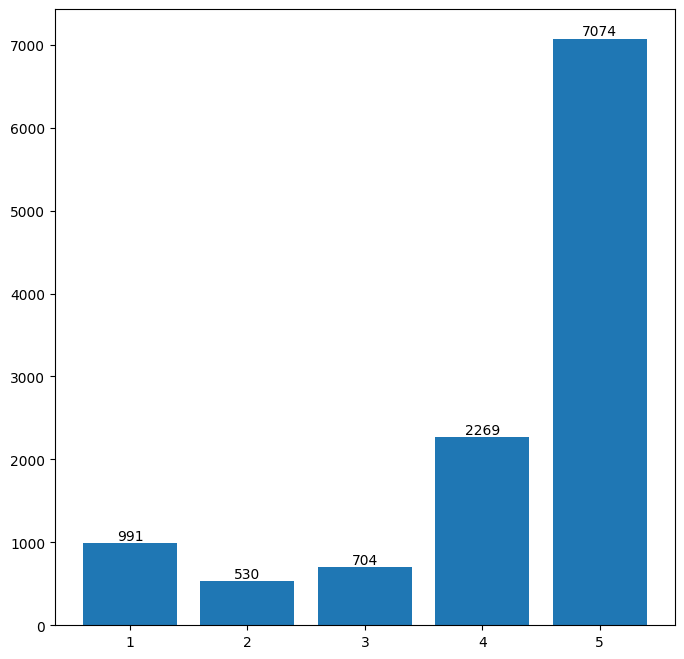

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['review'].unique(), df_train['review'].value_counts())
ax.bar_label(bars)
plt.show()

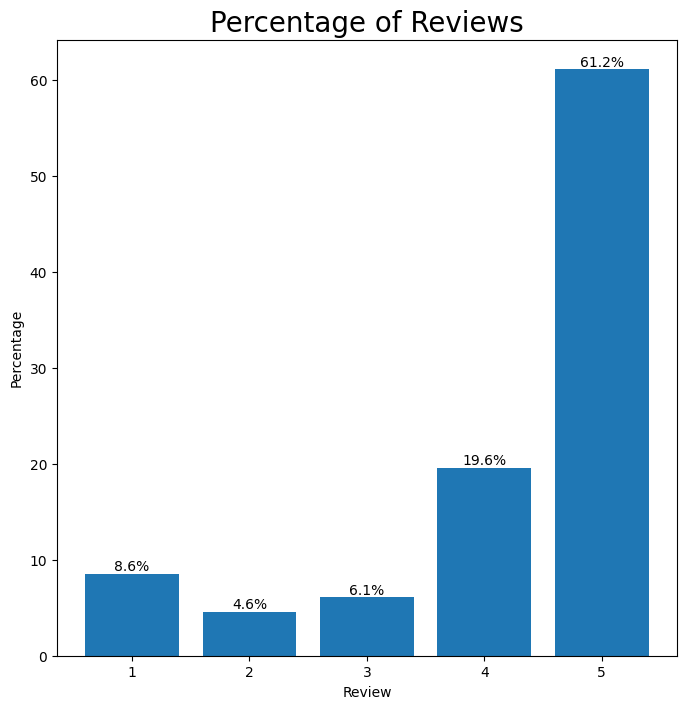

In [22]:
#Show a barplot by Percentages
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['review'].unique(), (df_train['review'].value_counts())/(df_train['review'].value_counts().sum())*100)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews', fontsize = 20)
plt.show()

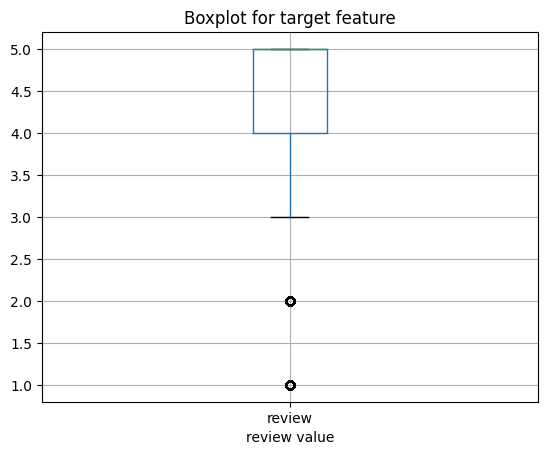

In [23]:
#Create a box plot to check for outliers, median and quartiles
df_train.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [24]:
df_train['review'].describe().T

count    11568.000000
mean         4.251642
std          1.168314
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 79.4% of the entries with a High/Postive review [4, 5]. Only 12% of the entries have a Low/Negative review [1, 2]. And 8.5% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile above 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.

# Univariate EDA

## Categories

In [25]:
categories = df_train['categories']
categories.info()

<class 'pandas.core.series.Series'>
Index: 11568 entries, 5874 to 12059
Series name: categories
Non-Null Count  Dtype 
--------------  ----- 
11568 non-null  object
dtypes: object(1)
memory usage: 180.8+ KB


In [26]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 10


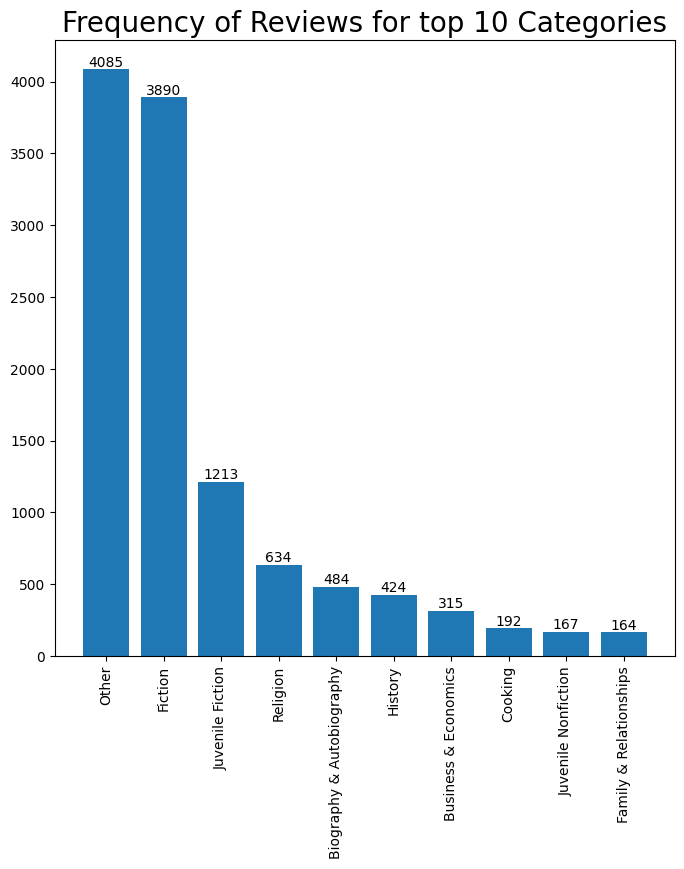

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['categories'].value_counts(ascending=False).keys(), df_train['categories'].value_counts(ascending=False))
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

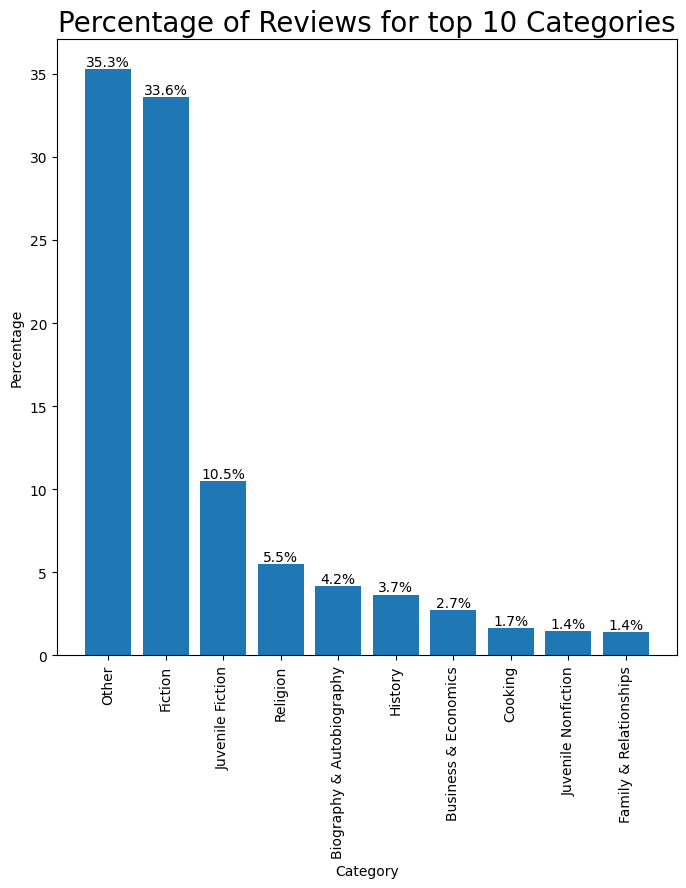

In [32]:
#Show a barplot by Percentages
category_percetage = df_train['categories'].value_counts(ascending=False)/df_train['categories'].value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['categories'].value_counts(ascending=False).keys(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

In [29]:
#FIXME!
#Merge Categories, Fiction, Juvenil Fiction
#social sciense.

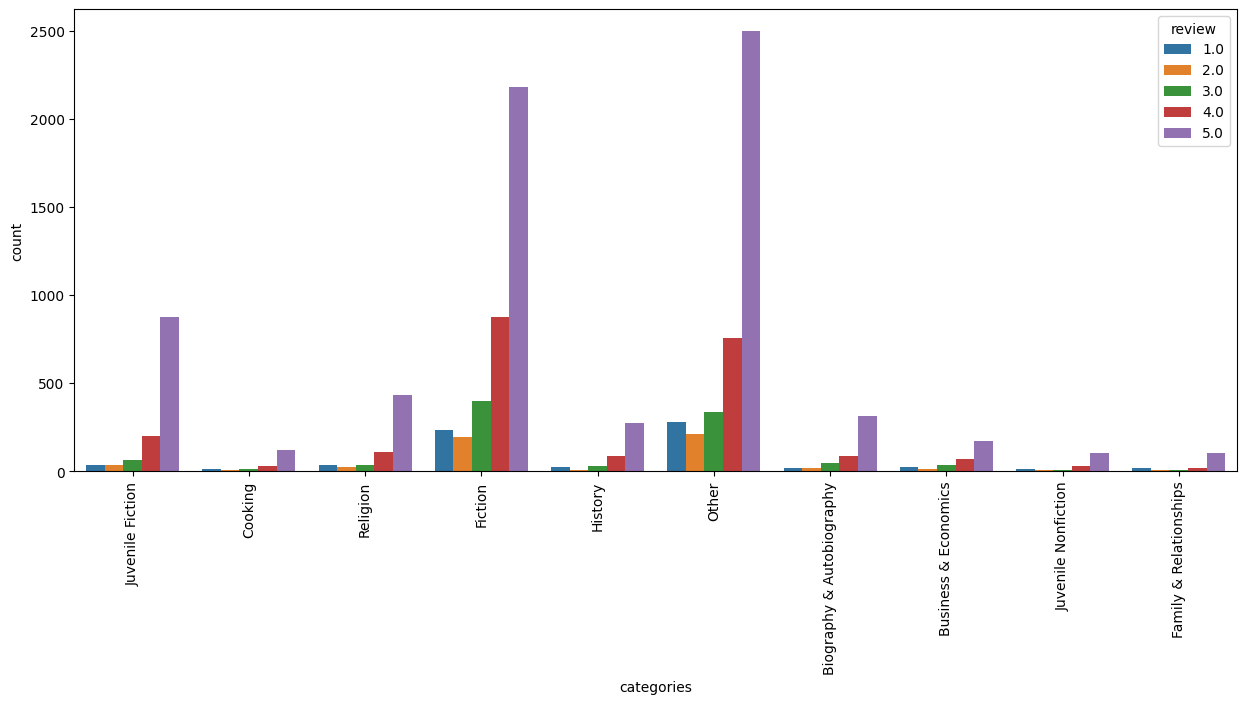

In [34]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_train, x = 'categories', hue='review')
plt.xticks(rotation=90)
plt.show()

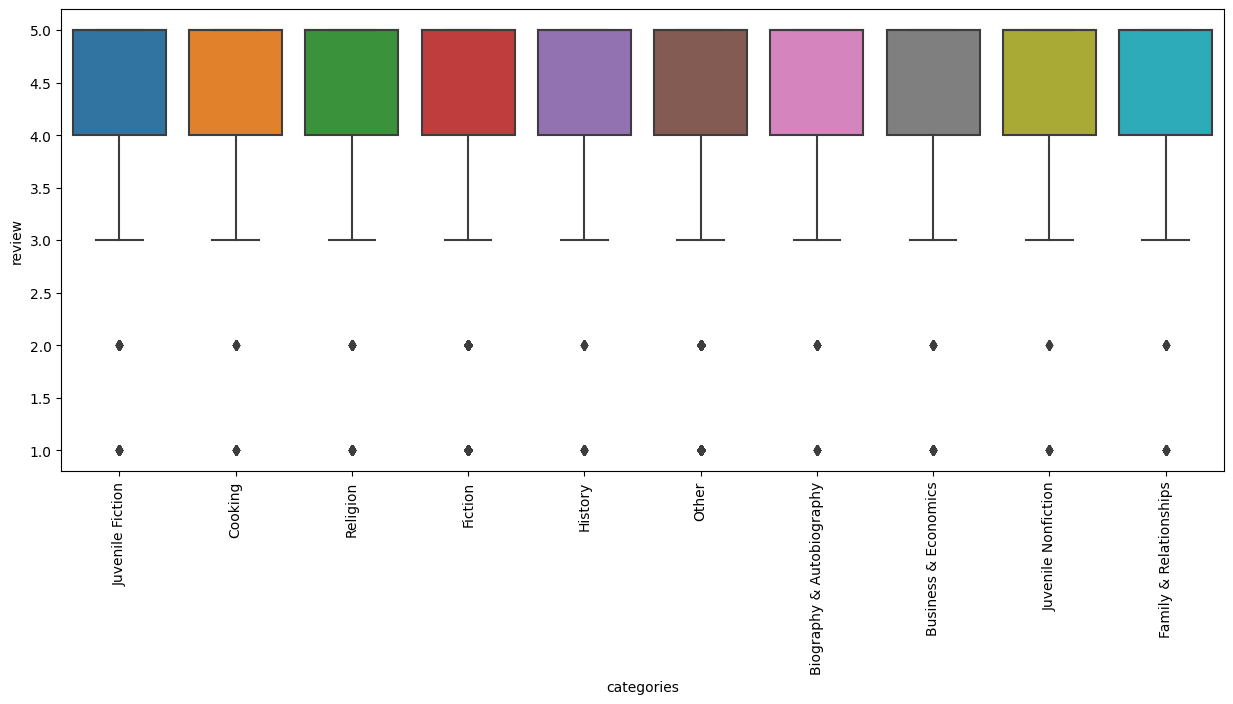

In [35]:
plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=df_train)
plt.xticks(rotation=90)
plt.show()

In [38]:
df_train['categories'].unique()

array(['Juvenile Fiction', 'Cooking', 'Religion', 'Fiction', 'History',
       'Other', 'Biography & Autobiography', 'Business & Economics',
       'Juvenile Nonfiction', 'Family & Relationships'], dtype=object)

### Key Findings for Categories:

- There are 10 different Categories in the Dataset.
- All of the reviewed categories contains reviews values in the 5 Categories [1, 2, 3, 4, 5]. All of the are biased to high review score.
- All categories but 'Computers' have lower quartile limit in Rating of 4 and minimum values of 3, but with outliers in 1 and 2 score reviews groups. 'Computers have the 25% quartile of 3 and minimum of 1.
- 'Fiction' is most rated category after grouped 'Others'. This category is biased to High review scores, having the mean on 4.5. And the 25% quartile on 4.

## Authors

In [28]:
# authors = df_all_data_processed['authors'].explode()
# authors.info()

<class 'pandas.core.series.Series'>
Index: 502906 entries, 0 to 502037
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
502906 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [29]:
# print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 10


In [30]:
# author_counts = authors.value_counts(ascending=False)
# print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 502906


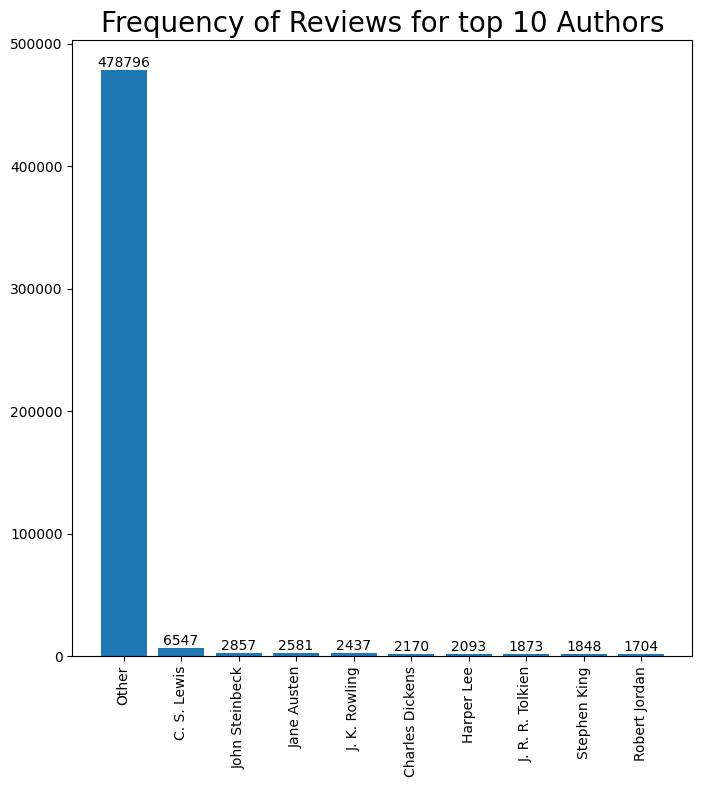

In [31]:
# fig, ax = plt.subplots(figsize=(8, 8))
# bars = ax.bar(df_all_data_processed['authors'].explode().unique(), df_all_data_processed['authors'].explode().value_counts())
# # Set the bar labels (percentages) to be displayed above the bars
# ax.bar_label(bars)
# plt.title('Frequency of Reviews for top 10 Authors', fontsize = 20)
# plt.xticks(rotation=90)
# plt.show()

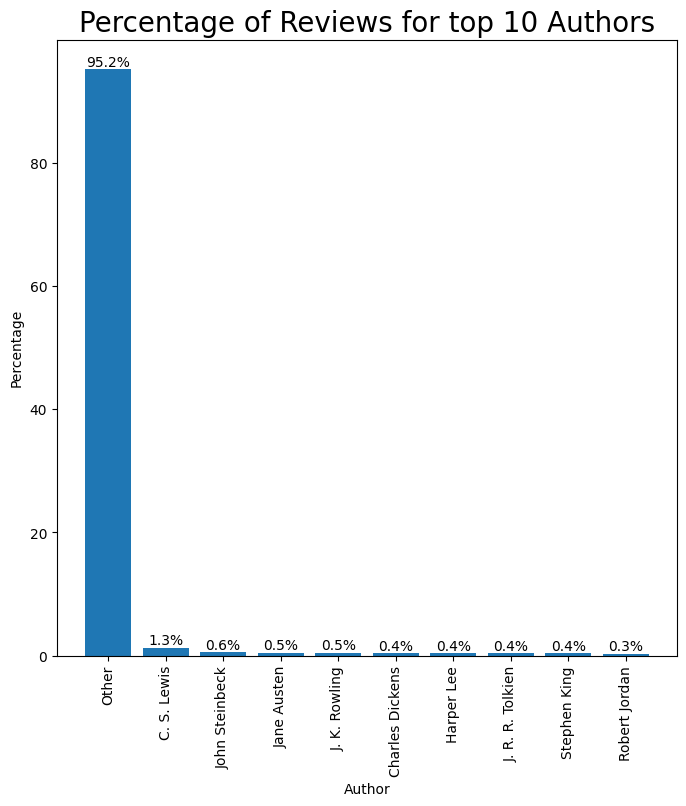

In [32]:
# #Show a barplot by Percentages
# author_percetage = df_all_data_processed['authors'].explode().value_counts()/df_all_data_processed['authors'].explode().value_counts().sum()*100

# fig, ax = plt.subplots(figsize=(8, 8))
# bars = ax.bar(df_all_data_processed['authors'].explode().unique(), author_percetage)

# # Set the bar labels (percentages) to be displayed above the bars
# ax.bar_label(bars, fmt='%.1f%%')

# plt.xlabel('Author')
# plt.ylabel('Percentage')
# plt.xticks(rotation=90)
# plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
# plt.show()


In [ ]:
#El porcentaje justifica eliminar la variable authors.

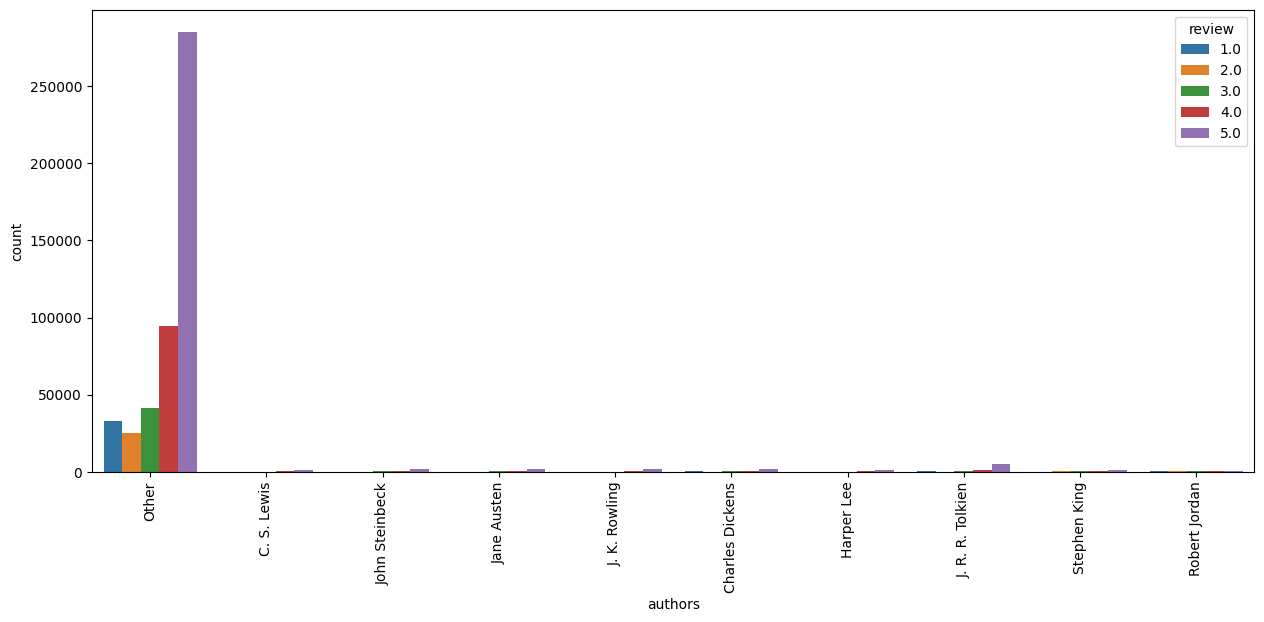

In [33]:
# plt.figure(figsize=(15, 6))
# sns.countplot(data=df_all_data_processed.explode('authors'), x = 'authors', hue='review')
# plt.xticks(rotation=90)
# plt.show()

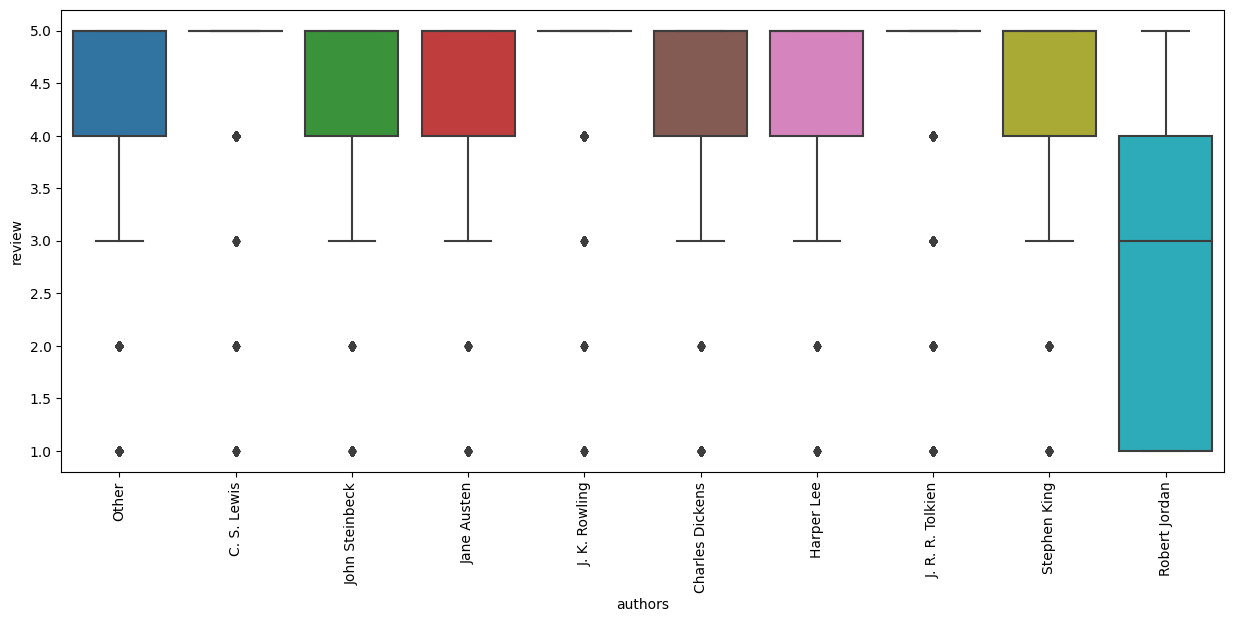

In [34]:
# plt.figure(figsize=(15, 6)) 
# sns.boxplot(x='authors', y='review', data=df_all_data_processed.explode('authors'))
# plt.xticks(rotation=90)
# plt.show()

### Key Findings for Authors

- All of the reviewed authors contains reviews values in the 5 review scores [1 , 2, 3, 4, 5]. All of the authors but Robert Jordan, are biased to high review score. J. R. R. Tolkien, J.K Rowling and C.S. Lewis show the 25%, 50% and 75% quartiles of 5 review score. Robert Jordan has a review score more balanced, with the median on 3 and de quartile 75% under 4.
- Others authors represent the 95.2% of the Dataset. 


## Published Year

In [39]:
pub_year = df_train[['published_year','review']]
pub_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 5874 to 12059
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   published_year  11568 non-null  int64  
 1   review          11568 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 271.1 KB


In [40]:
pub_year = pub_year.groupby('published_year')['review'].agg(['mean', 'count']).reset_index()
pub_year

,published_year,mean,count
0,1996,4.111511,278
1,1997,4.354610,282
2,1998,4.262391,343
3,1999,4.181070,486
4,2000,4.155556,450
5,2001,4.275335,523
6,2002,4.254372,629
7,2003,4.258065,775
8,2004,4.231458,782
9,2005,4.260442,814


In [41]:
pub_year['published_year'].describe().T

count      18.000000
mean     2004.500000
std         5.338539
min      1996.000000
25%      2000.250000
50%      2004.500000
75%      2008.750000
max      2013.000000
Name: published_year, dtype: float64

In [ ]:
#FIXME
# Hypotesis: review de libros publicados en tiempos presentes. Limitado a estos periodos. Por ejemplo el año de 1995

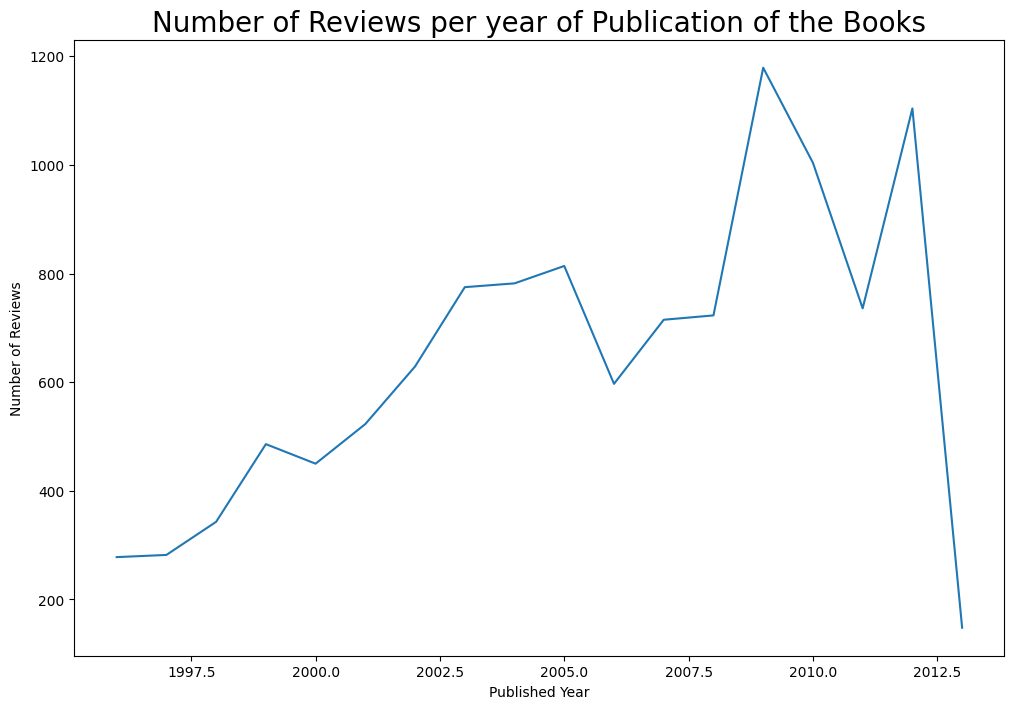

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['count'], linestyle='-')
plt.xlabel('Published Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per year of Publication of the Books', fontsize = 20)
plt.show()

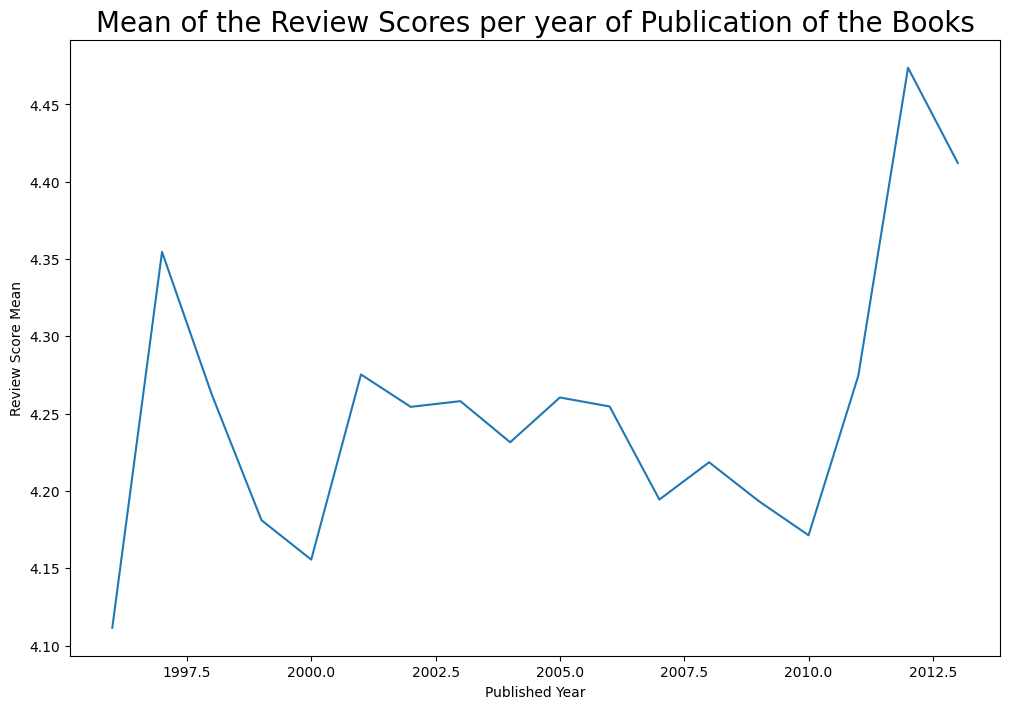

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['mean'], linestyle='-')
plt.xlabel('Published Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores per year of Publication of the Books', fontsize = 20)
plt.show()

In [45]:
pub_year_counts = df_train['published_year'].value_counts(ascending=False)
top_10_pub_year_counts = pub_year_counts[:10].sort_values(ascending=False)
top_10_pub_year_counts

published_year
2009    1179
2012    1104
2010    1004
2005     814
2004     782
2003     775
2011     736
2008     723
2007     715
2002     629
Name: count, dtype: int64

In [46]:
other_pub_year_counts = pub_year_counts[10:].sum()
other_pub_year_counts

3107

In [47]:
top_pub_year_with_other = pd.concat([top_10_pub_year_counts, pd.Series({'Other': other_pub_year_counts})])
top_pub_year_with_other = top_pub_year_with_other.groupby(top_pub_year_with_other.index).sum()
top_pub_year_with_other = top_pub_year_with_other.sort_values(ascending=False)
top_pub_year_with_other

Other    3107
2009     1179
2012     1104
2010     1004
2005      814
2004      782
2003      775
2011      736
2008      723
2007      715
2002      629
dtype: int64

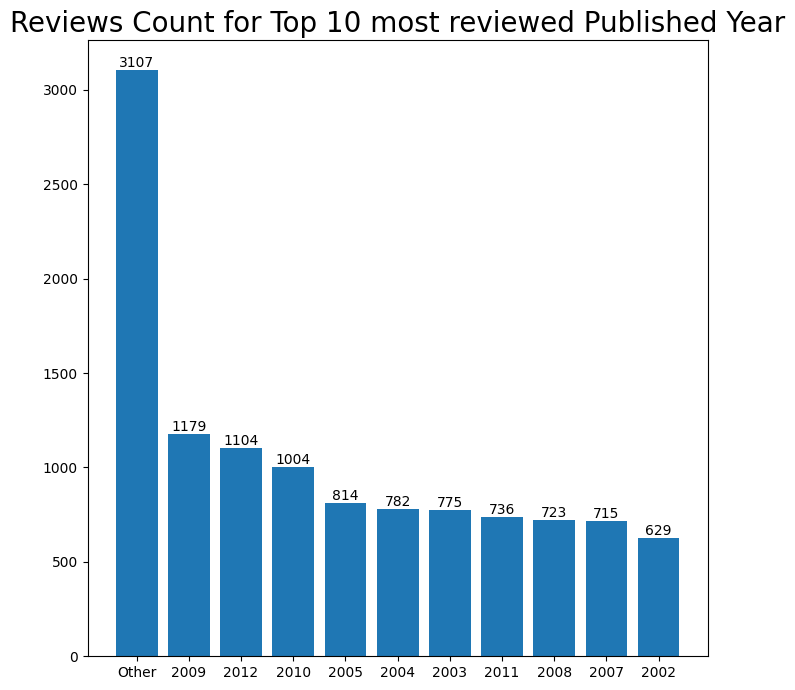

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), top_pub_year_with_other)
ax.bar_label(bars)
plt.title('Reviews Count for Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

In [ ]:
#FIXME: Agruparlo por años, de 5 en 5. También se puede acotar por cultura. Los reviews se hacían en diferentes buscadores, había menos acceso a internet. 
# Sobre una base equivalente. Esto es para review YEAR. -> 2010.
# Reduce el tamaño del dataset. Reduce.

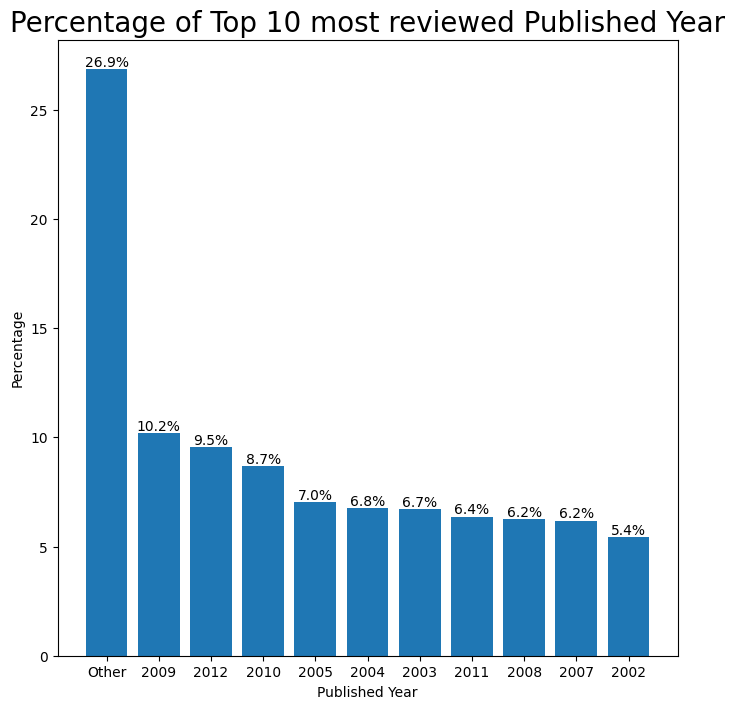

In [49]:
#Show a barplot by Percentages
pub_year_percetage = top_pub_year_with_other/pub_year_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), pub_year_percetage)

ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Published Year')
plt.ylabel('Percentage')
plt.title('Percentage of Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

In [50]:
top_10_pub_year_counts.keys().to_list()

[2009, 2012, 2010, 2005, 2004, 2003, 2011, 2008, 2007, 2002]

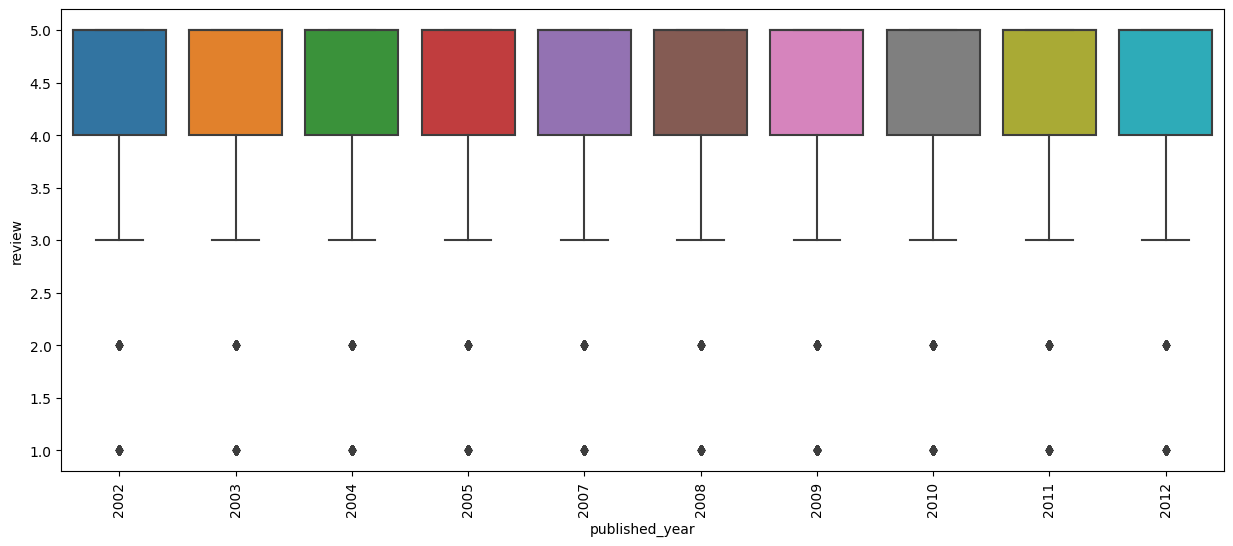

In [51]:
boxplot_published_year = df_train[df_train['published_year'].isin(top_10_pub_year_counts.keys().to_list())]

plt.figure(figsize=(15, 6)) 
sns.boxplot(x='published_year', y='review', data=boxplot_published_year)
plt.xticks(rotation=90)
plt.show()

In [56]:
df_train[['published_year', 'review']].corr().style.background_gradient(cmap='Blues')

,published_year,review
published_year,1.000000,0.026600
review,0.026600,1.000000


### Key Findings for Published Year

- The Top 10 published year with most reviews are 2012, 2010, 2009, 2011, 2005, 2003, 2004, 2014, 2001 and 2002. All of the reviews for this top 10 years, are biased to high scores. Having the quartile 25% above 4.
- The books published during the first decade of 2000's cover almost the 41.1% of the Total Dataset Reviews.
- The mean of the review score is stable between 4 and 4.5 for the books pusblished after 1900. The mean of the review for books published before 1850 is not stable, it changes on all the range for review score [1-5].


## Helpfulness

In [57]:
df_train.sample(2)

,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
3086,Other,Other,2010,2010,1.0,really great book enjoy cross stitch whether b...,0.9696,5.0
13553,Fiction,Other,2012,2013,1.0,hurts give one betty neels books stars honest...,0.9991,2.0


In [58]:
df_train['helpfulness'].describe().T

count    11568.000000
mean         0.869370
std          0.306385
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: helpfulness, dtype: float64

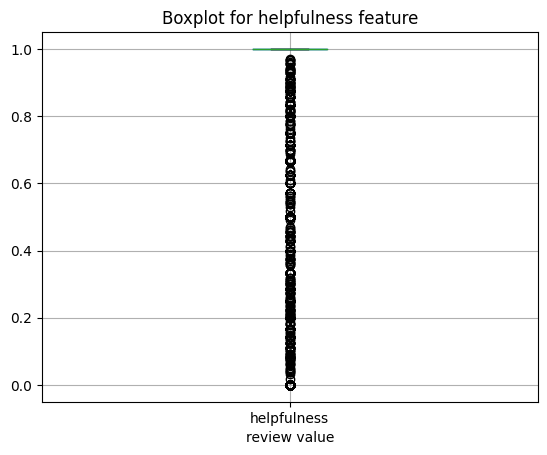

In [59]:
#Create a box plot to check for outliers, median and quartiles 4/6 0/0 1/3 5/5
df_train.boxplot(column='helpfulness')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness feature")
plt.show()

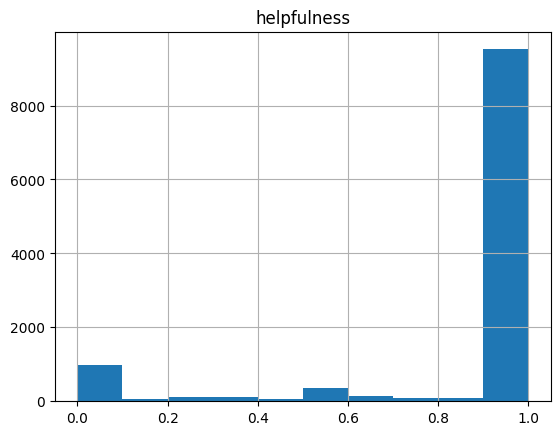

In [61]:
df_train.hist(column='helpfulness')
plt.show()

In [62]:
#Correlation Analysis 
df_train[['helpfulness','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness,review
helpfulness,1.000000,0.329972
review,0.329972,1.000000


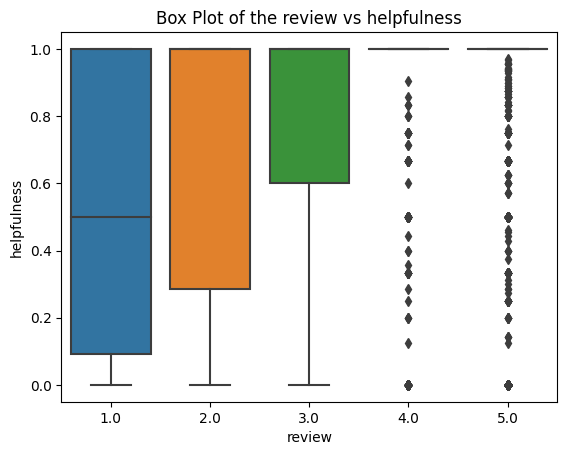

In [63]:
sns.boxplot(x='review', y='helpfulness', data=df_train)
plt.xlabel('review')
plt.ylabel('helpfulness')
plt.title('Box Plot of the review vs helpfulness')
plt.show()

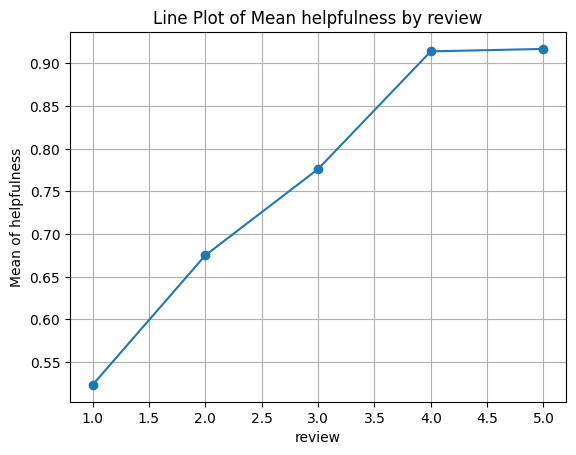

In [64]:
helpfulness_by_review = df_train.groupby('review')['helpfulness'].mean()

helpfulness_by_review.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('review')
plt.ylabel('Mean of helpfulness')
plt.title('Line Plot of Mean helpfulness by review')
plt.grid(True)
plt.show()

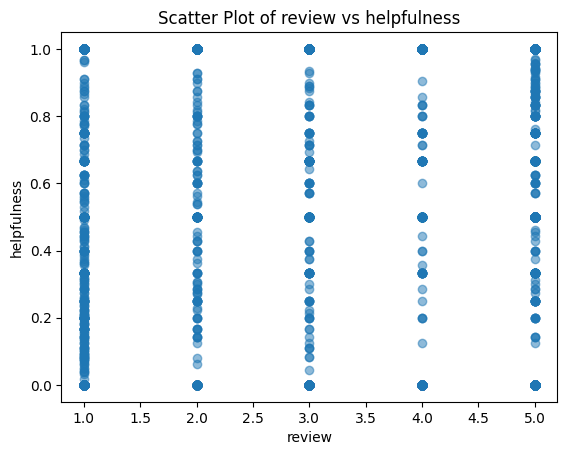

In [65]:
plt.scatter(df_train['review'], df_train['helpfulness'], alpha=0.5)
plt.xlabel('review')
plt.ylabel('helpfulness')
plt.title('Scatter Plot of review vs helpfulness')
plt.show()

### Key Findings for helpfulness

- Reviews with a high review score are found more helpfull than reviews with low review score.
- Mean of the helpfulness and review have a linear relationship.


## Review_Year

In [66]:
rev_year = df_train[['review_year','review']]
rev_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 5874 to 12059
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_year  11568 non-null  int64  
 1   review       11568 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 271.1 KB


In [67]:
rev_year = rev_year.groupby('review_year')['review'].agg(['mean', 'count']).reset_index()
rev_year

,review_year,mean,count
0,2010,4.120729,2195
1,2011,4.165973,2404
2,2012,4.262815,4448
3,2013,4.427608,2521


In [68]:
rev_year['review_year'].describe().T

count       4.000000
mean     2011.500000
std         1.290994
min      2010.000000
25%      2010.750000
50%      2011.500000
75%      2012.250000
max      2013.000000
Name: review_year, dtype: float64

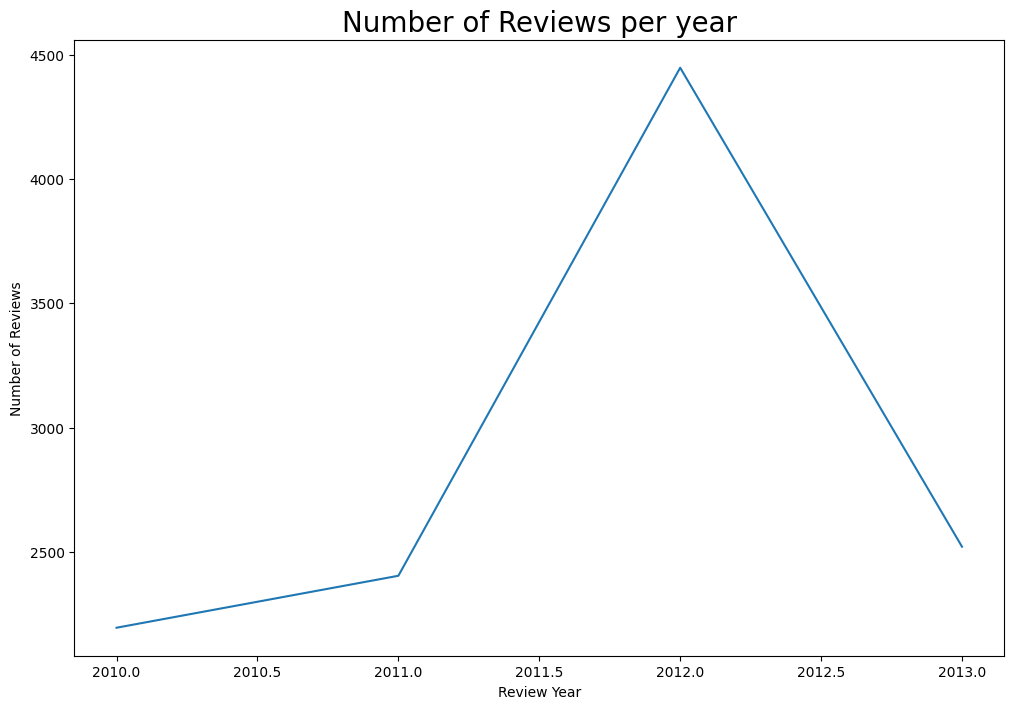

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(rev_year['review_year'], rev_year['count'], linestyle='-')
plt.xlabel('Review Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per year', fontsize = 20)
plt.show()

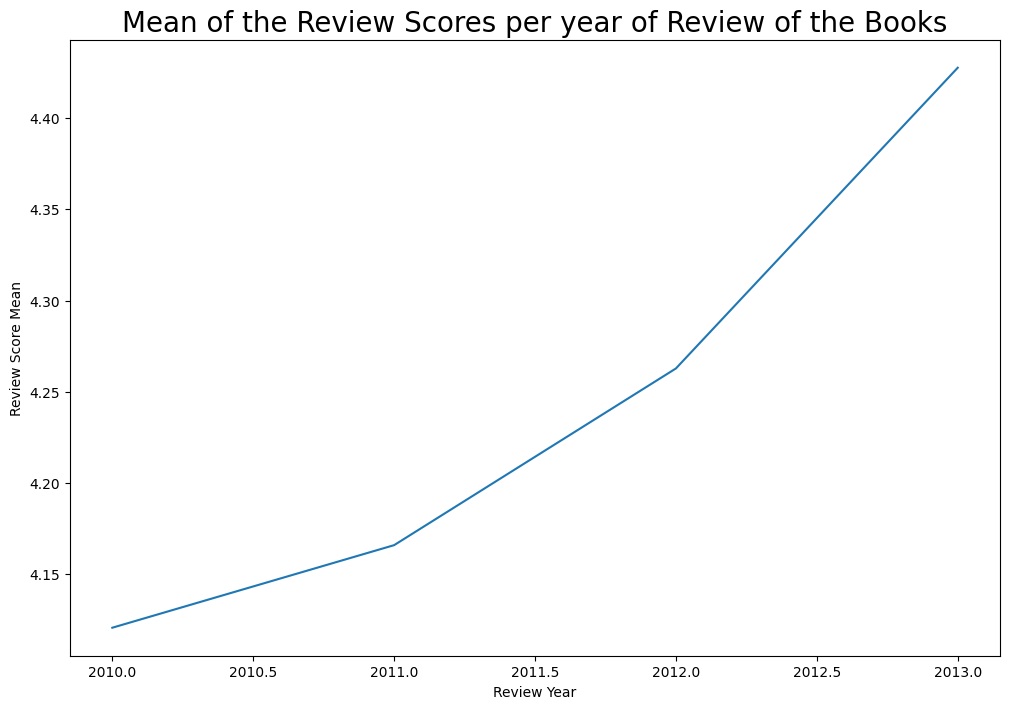

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(rev_year['review_year'], rev_year['mean'], linestyle='-')
plt.xlabel('Review Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores per year of Review of the Books', fontsize = 20)
plt.show()

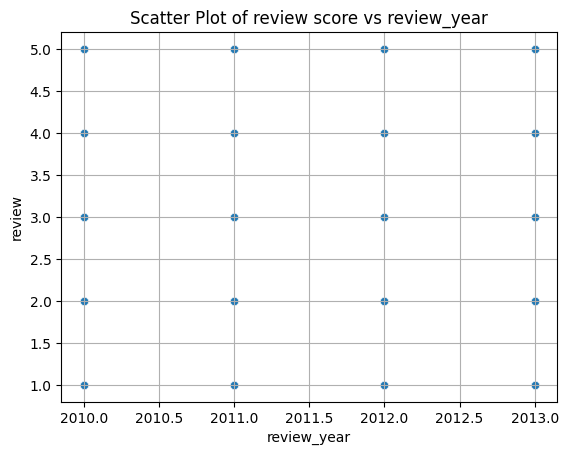

In [71]:
sns.scatterplot(x='review_year', y='review', data=df_all_data_processed)
plt.xlabel('review_year')
plt.ylabel('review')
plt.title('Scatter Plot of review score vs review_year')
plt.grid(True)
plt.show()

In [72]:
df_train[['review_year', 'review']].corr().style.background_gradient(cmap='Blues')

,review_year,review
review_year,1.000000,0.090579
review,0.090579,1.000000


In [73]:
review_year_counts = df_train['review_year'].value_counts(ascending=False)
top_10_review_year_counts = review_year_counts[:10].sort_values(ascending=False)
top_10_review_year_counts

review_year
2012    5886
2013    3367
2011    3240
2010    2932
Name: count, dtype: int64

In [74]:
other_review_year_counts = review_year_counts[10:].sum()
other_review_year_counts

0

In [75]:
top_review_year_with_other = pd.concat([top_10_review_year_counts, pd.Series({'Other': other_review_year_counts})])
top_review_year_with_other = top_review_year_with_other.groupby(top_review_year_with_other.index).sum()
top_review_year_with_other = top_review_year_with_other.sort_values(ascending=False)
top_review_year_with_other

2012     5886
2013     3367
2011     3240
2010     2932
Other       0
dtype: int64

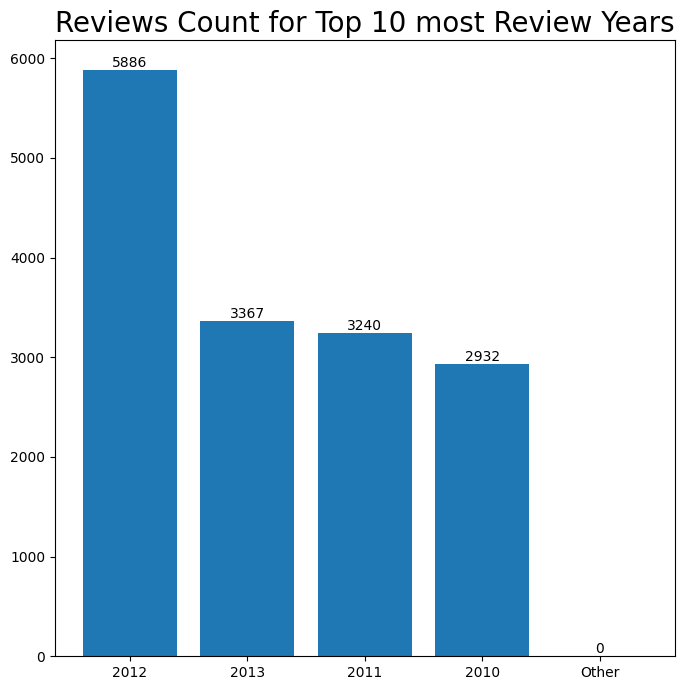

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_review_year_with_other.keys().map(str), top_review_year_with_other)
ax.bar_label(bars)
plt.title('Reviews Count for Top 10 most Review Years', fontsize = 20)
plt.show()

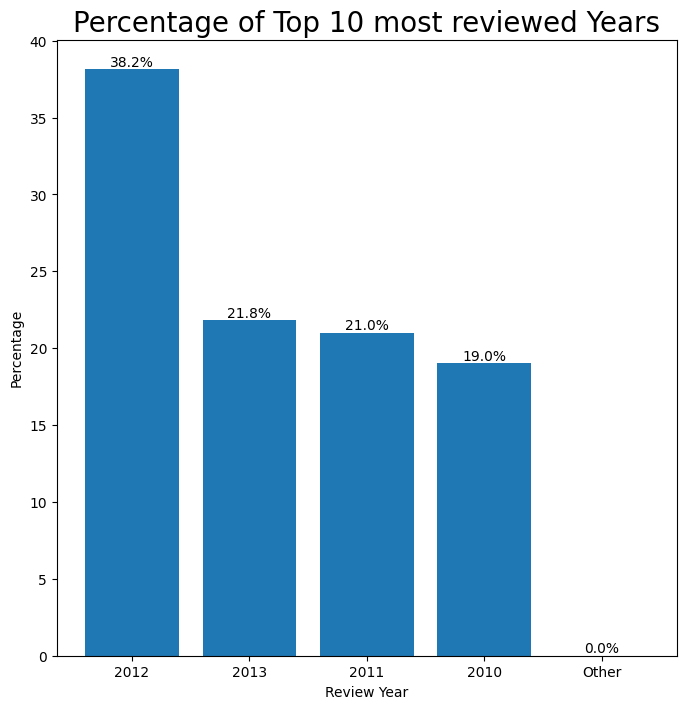

In [77]:
#Show a barplot by Percentages
review_year_percetage = top_review_year_with_other/review_year_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_review_year_with_other.keys().map(str), review_year_percetage)

ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review Year')
plt.ylabel('Percentage')
plt.title('Percentage of Top 10 most reviewed Years', fontsize = 20)
plt.show()

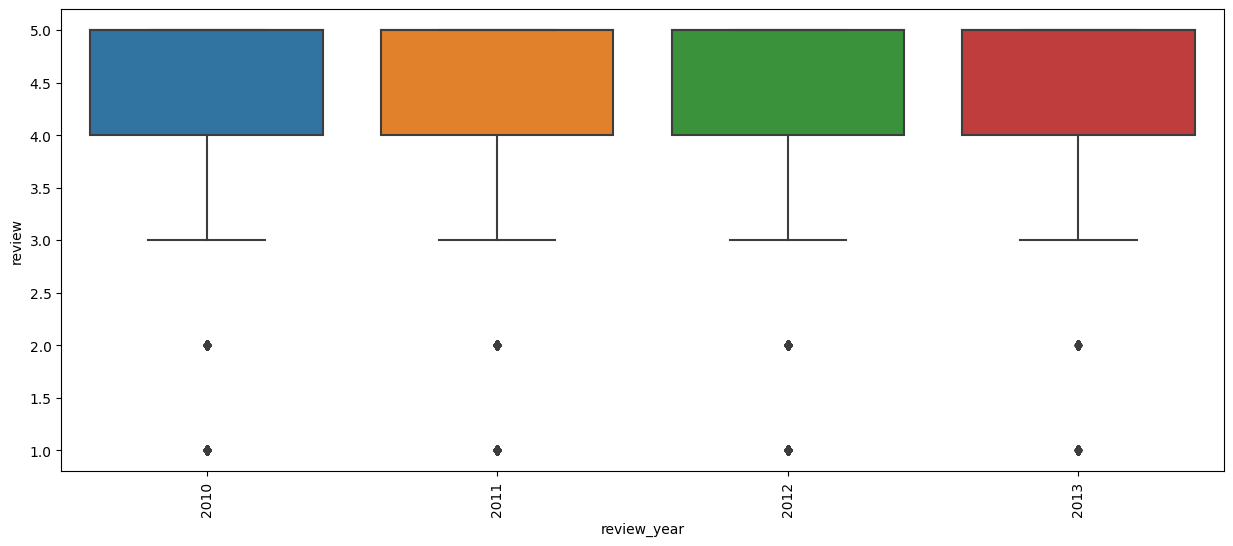

In [78]:
boxplot_review_year_df = df_train[df_train['review_year'].isin(top_10_review_year_counts.keys().to_list())]

plt.figure(figsize=(15, 6)) 
sns.boxplot(x='review_year', y='review', data=boxplot_review_year_df)
plt.xticks(rotation=90)
plt.show()

In [79]:
top_10_review_year_counts.keys()

Index([2012, 2013, 2011, 2010], dtype='int64', name='review_year')

### Key Findings for Review Year
- Top 10 years where most reviews where performed on Amazon Books are 2012, 2000, 1999, 2005, 2006, 2001, 2002, 2004, 2003 and 2007.
- The Review score for all of the top 10v years is biased to high scores. Having the 25% Quartile above 4. And the median on 5.

## Publisher

In [80]:
df_train.sample(2)

,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
1567,History,Other,2007,2010,1.0,professional warrior although practice martial...,0.5620,5.0
7473,Fiction,Other,2007,2013,1.0,chose stars quality christian historical roma...,0.8658,5.0


In [81]:
df_train['publisher'] = pd.Categorical(df_train['publisher'])

In [82]:
print(f'Total of Publishers: {len(df_train["publisher"].unique())}')

Total of Publishers: 10


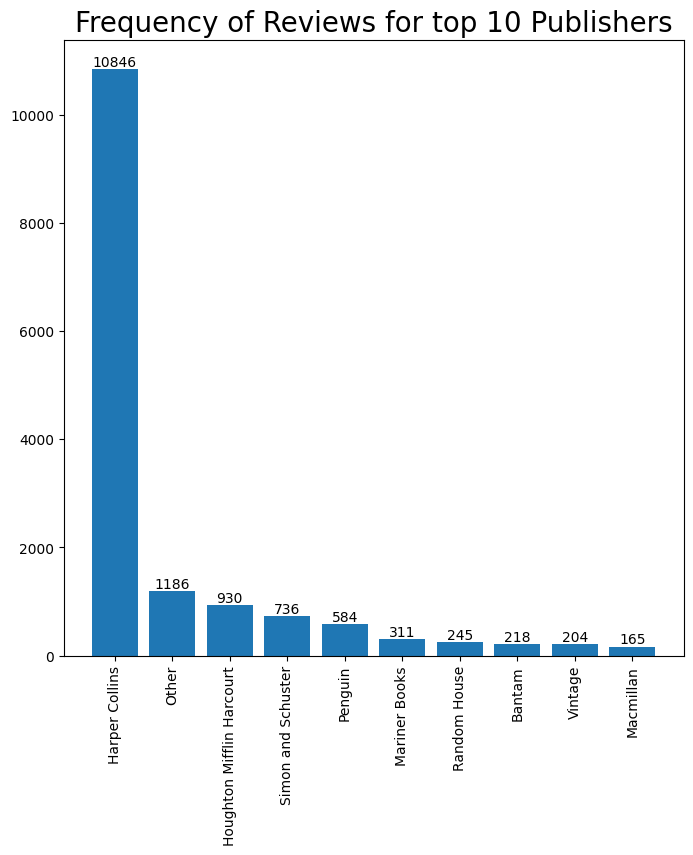

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['publisher'].unique(), df_train['publisher'].value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

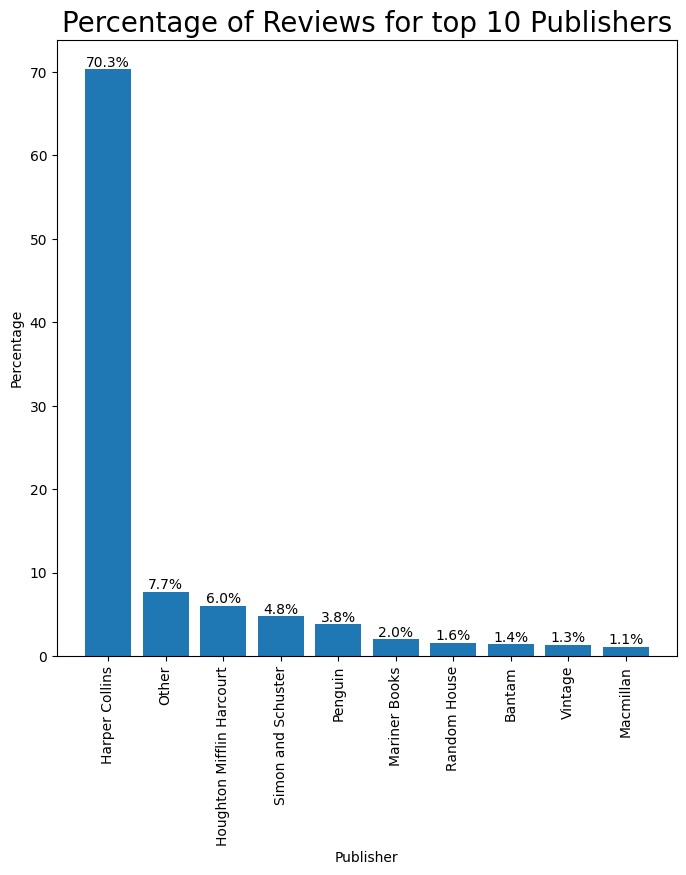

In [84]:
#Show a barplot by Percentages
author_percetage = df_train['publisher'].value_counts()/df_train['publisher'].value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['publisher'].unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Publishers', fontsize = 20)
plt.show()


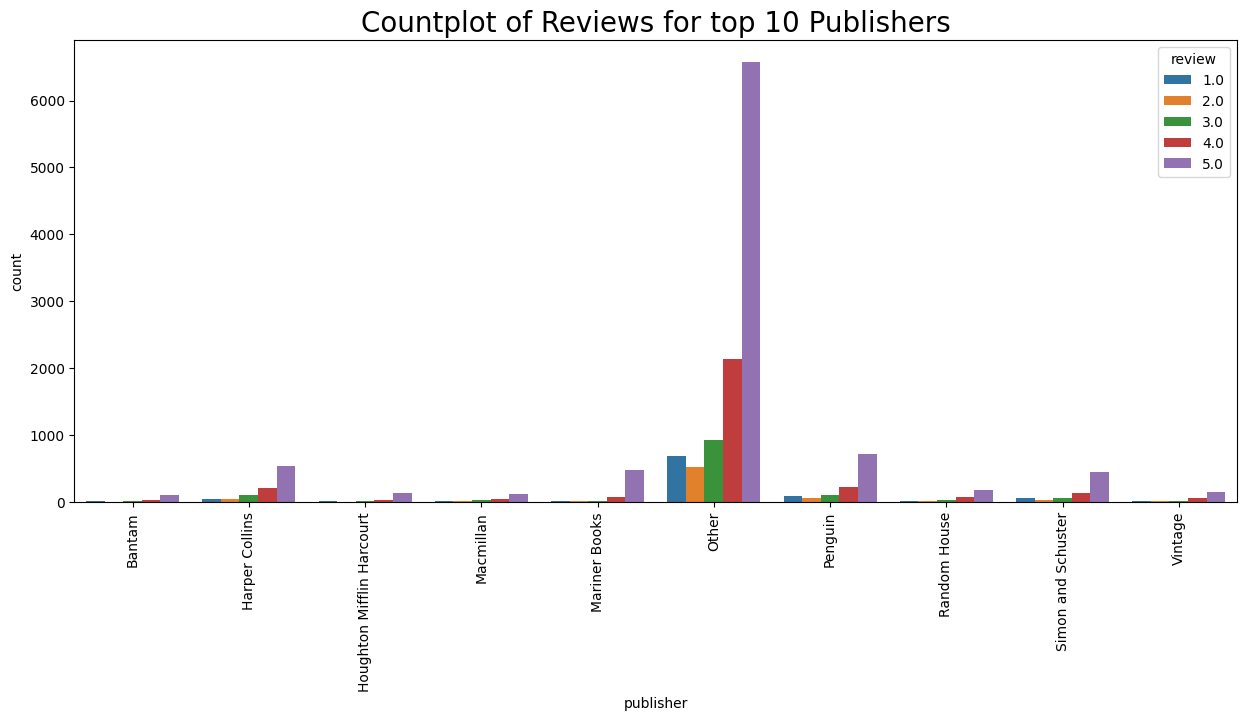

In [85]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_train, x = 'publisher', hue='review')
plt.title('Countplot of Reviews for top 10 Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

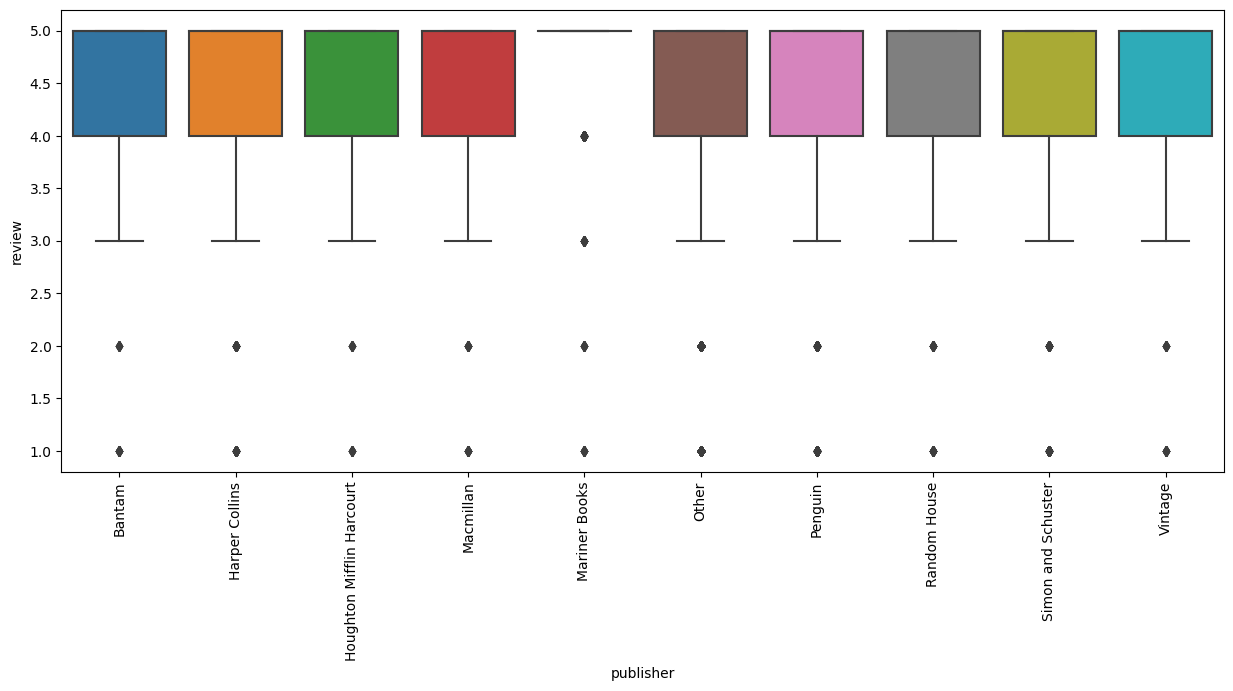

In [86]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='publisher', y='review', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Key Findings for Publisher

- All of the Top Publishers have a Review Score biased to high values. All of them but Macmillan have the 25% percentile above 4. Having the median value and 75% percentile on 5. 
- All of the Publishers have values on the 5 possible review scores. As it contains valid variability, this feature is kept.

## Compound Sentiment

This variable is the result of applying vader lexicon with NLTK library to the cleaned text review from the Dataset.

In [121]:
df_train.sample(2)

,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
6180,Juvenile Fiction,Simon and Schuster,2008,2012,1.0,story girl whose family torn apart japanese internment us beautiful thoughtful thoughtprovoking gives reader glimpse felt like live events story t...,0.9774,5.0
1545,Other,Other,2007,2012,1.0,book pretty useless correlate lectures well problems overly complicated help understand concepts completed,0.3612,2.0


In [122]:
df_train['compound_sentiment'].describe().T

count    11568.000000
mean         0.611530
std          0.496486
min         -0.999700
25%          0.510600
50%          0.827100
75%          0.936000
max          0.999600
Name: compound_sentiment, dtype: float64

compound_sentiment range goes from -1 to 1. As more near is the value to 1, more positive is the sentiment extracted from the text. And as more near to -1 is the value,
more negative is the sentiment predicted from the value.

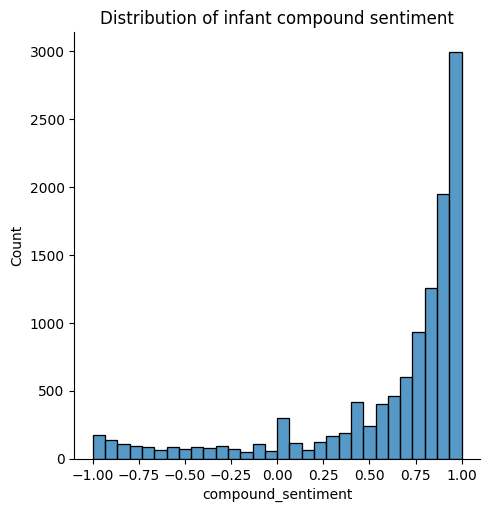

In [123]:
sns.displot(df_train['compound_sentiment'], bins=30)

plt.title('Distribution of infant compound sentiment')

plt.show()

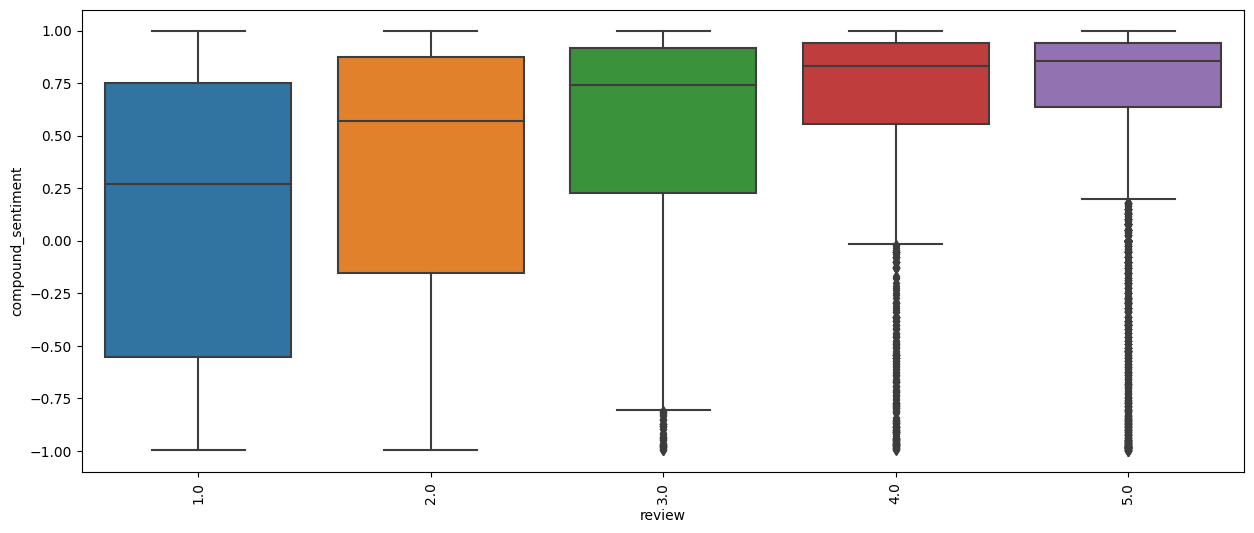

In [124]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='review', y='compound_sentiment', data=df_train)
plt.xticks(rotation=90)
plt.show()

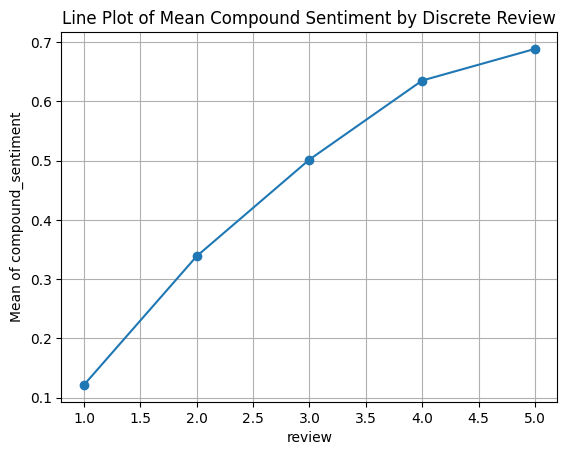

In [125]:
mean_by_review = df_train.groupby('review')['compound_sentiment'].mean()
mean_by_review.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('review')
plt.ylabel('Mean of compound_sentiment')
plt.title('Line Plot of Mean Compound Sentiment by Discrete Review')
plt.grid(True)
plt.show()

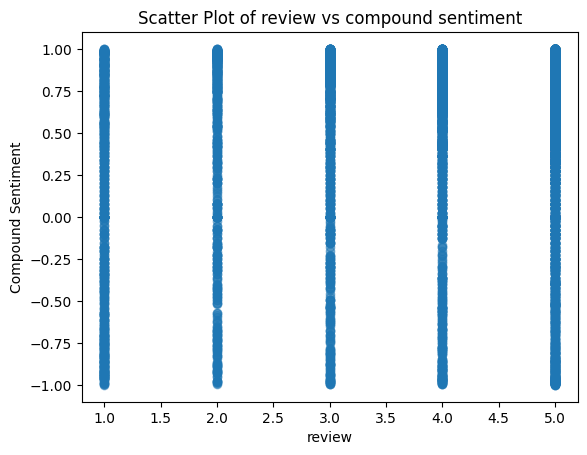

In [126]:
plt.scatter(df_train['review'], df_train['compound_sentiment'], alpha=0.5)
plt.xlabel('review')
plt.ylabel('Compound Sentiment')
plt.title('Scatter Plot of review vs compound sentiment')
plt.show()

In [127]:
df_train[['compound_sentiment', 'review']].corr().style.background_gradient(cmap='Blues')

,compound_sentiment,review
compound_sentiment,1.000000,0.294729
review,0.294729,1.000000


### Key Findings for Compound Sentiment

- From the Distribution Plot, it is visible that Compound Sentiment Feature is biased to high levels/positive levels.
- The Boxplot figure shows the relation between review and compound sentiment. For High score reviews, the Compound sentiments tends to increase and be positive. And for Low Review Scores, the sentiment tends to be negative. This can explain the first bullet, because the dataset contains more entries with High Score Values, the positive Compound sentiment will increse.
- The line plot confirms the relationship between review and compound sentiment, plotting the mean of the compound sentiment for each review score. There is a positive relation. When review tends to be high, compound sentiment tends to be 1. 

## EDA for Review Text Column

In [95]:
pd.set_option('display.max_colwidth', 150)

In [128]:
df_train[df_train['review']==5]['text_clean'].sample(5, random_state=1299)

10835                                                           book lives description even features expected useful practice book arrived excellent condition
10040                                               worth it enjoy &#;real&#; people addition hard sf it wish big theme sf offered human terms author mastered
14944    laugh loud book funny well written book times reminds good earlyquentin tarantino film in fact quentin reading option book next moviethe plot revo...
6438     child always big fan adventures madeline especially enjoyed story love dogs particular story touched small age madeline adventurous little girl le...
3852     read book first listened audio a gift boyfriend new much loved women run wolves delighted discover dr clarissa pinkolaestes youthful pretty encour...
Name: text_clean, dtype: object

Word Cloud of most repeated 100 words on reviews with a review Score = 5. 


In [97]:
#FIXME Extraer texto por tipo de categoria

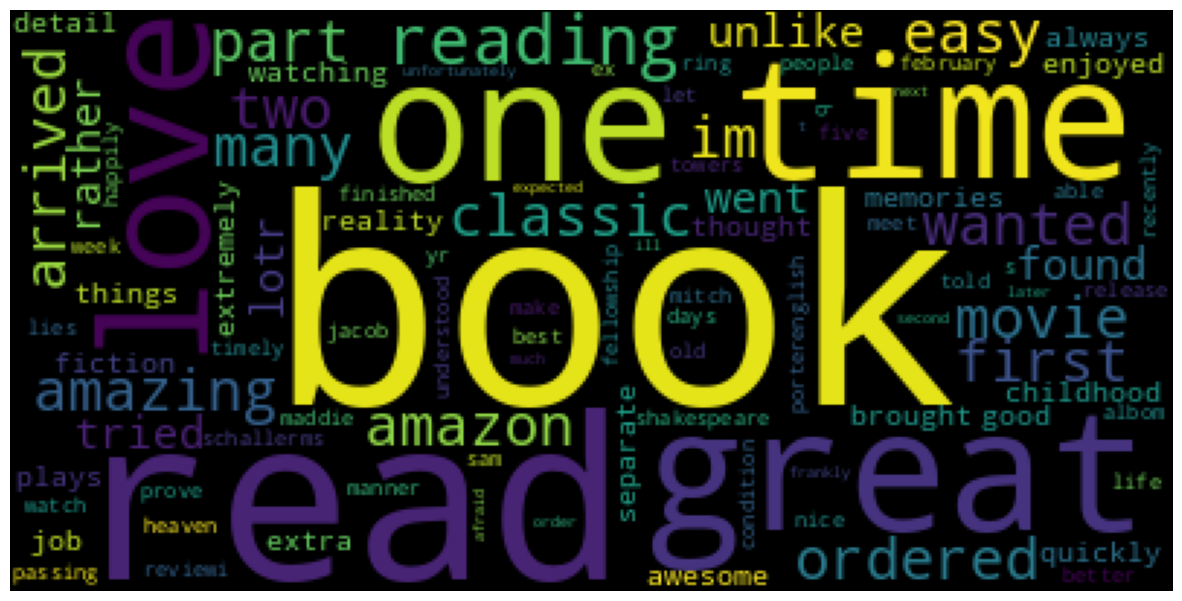

In [129]:
wordcloud5 = WordCloud(max_words=100).generate(str(df_train[df_train['review']==5]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [130]:
df_train[df_train['review']==1]['text_clean'].sample(5, random_state=1299)

13089    book gross like palahniuk sat wrote disgusting things could think of put five stories away people know could think sort thing put rest book last m...
12374    book pretty organized well and looks it great cookbook starter home cooks especially vegetarian home cooks food terrible every time ive made recip...
9785     ugh probably every generation thought greatest book highly popular caters current generation hardly objective researched comparing generations mea...
190      proof dna test west africans trace roots right back north & east africa white folks want admit africans brought america and central& south america...
13459    lincoln interminable pointless finished already invested much time it think blighted entire june know history people praising vidal covering opini...
Name: text_clean, dtype: object

In [131]:
df_train[df_train['review']==3]['text_clean'].sample(5, random_state=1299)

14848                             stories great kindle version artwork read amazon review book mentions artwork yet none found digital version come get amazon
1310     tipping point well written book easy understand concepts author wrote uses examples effective reinforcing points believe book would best read indi...
2181     hard understand word zen made title since book never really spends much time zen practice ideas set road trip novel recounts reunification persona...
7739     overall really enjoyed book specifically liked dialogue four main characters connie oliver mellors sir clifford mrs bolton thought plot a titled b...
13114    good social political history region period however title extremly misleading it front cover the paper back shows british artillerymen suggests bo...
Name: text_clean, dtype: object

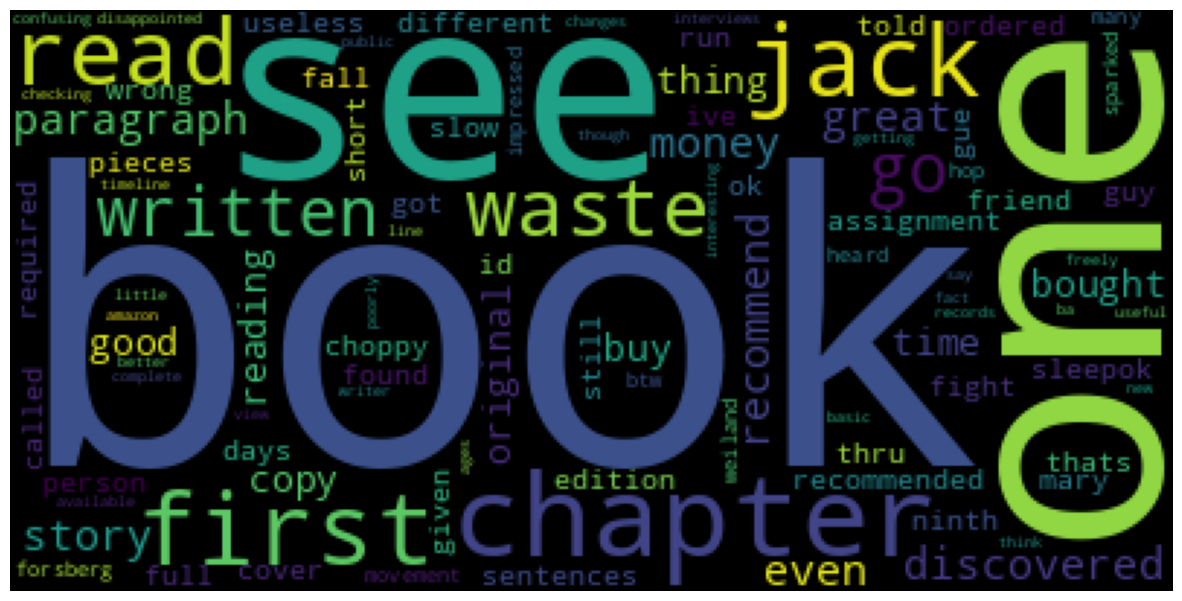

In [132]:
wordcloud1 = WordCloud(max_words=100).generate(str(df_train[df_train['review']==1]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

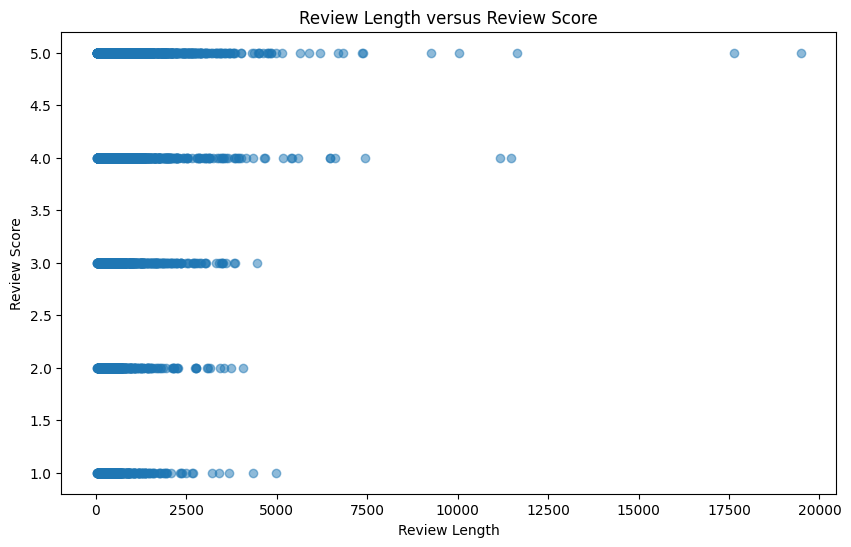

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['text_clean'].str.len(), df_train['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [135]:
df_train['text_clean'].str.len().mean()

413.22242392807743

In [136]:
df_train['text_clean'].str.len().std()

668.1677532715174

In [137]:
long_reviews = df_train[df_train['text_clean'].str.len() > 2000].copy()

len(long_reviews)

317

In [138]:
long_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
published_year,317.0,2005.435331,4.407245,1996.0000,2002.000000,2006.0000,2009.000,2013.0000
review_year,317.0,2011.217666,0.927739,2010.0000,2010.000000,2011.0000,2012.000,2013.0000
helpfulness,317.0,0.879778,0.251789,0.0000,0.954545,1.0000,1.000,1.0000
compound_sentiment,317.0,0.588312,0.740489,-0.9997,0.807400,0.9868,0.996,0.9996
review,317.0,4.170347,1.103506,1.0000,4.000000,5.0000,5.000,5.0000


In [139]:
long_reviews['text_clean'].str.len().mean()

3223.1955835962144

In [140]:
short_reviews = df_train[df_train['text_clean'].str.len() < 200].copy()

len(short_reviews)

5925

In [141]:
short_reviews['text_clean'].str.len().mean()

111.0146835443038

In [142]:
short_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
published_year,5925.0,2006.041519,4.641608,1996.0000,2003.0000,2007.0000,2010.000,2013.0000
review_year,5925.0,2011.906835,1.002745,2010.0000,2011.0000,2012.0000,2013.000,2013.0000
helpfulness,5925.0,0.867522,0.320760,0.0000,1.0000,1.0000,1.000,1.0000
compound_sentiment,5925.0,0.592732,0.403678,-0.9552,0.4404,0.7506,0.875,0.9933
review,5925.0,4.384810,1.078505,1.0000,4.0000,5.0000,5.000,5.0000


In [143]:
high_reviews = df_train[df_train['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

367.27777777777777

In [144]:
neutral_reviews = df_train[df_train['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

514.3249243188699

In [145]:
low_reviews = df_train[df_train['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

413.27982954545456

<Figure size 1000x600 with 0 Axes>

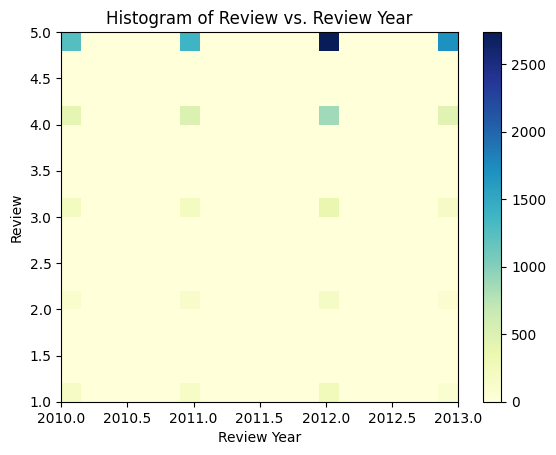

In [146]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
plt.figure()
plt.hist2d(df_train['review_year'], df_train['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

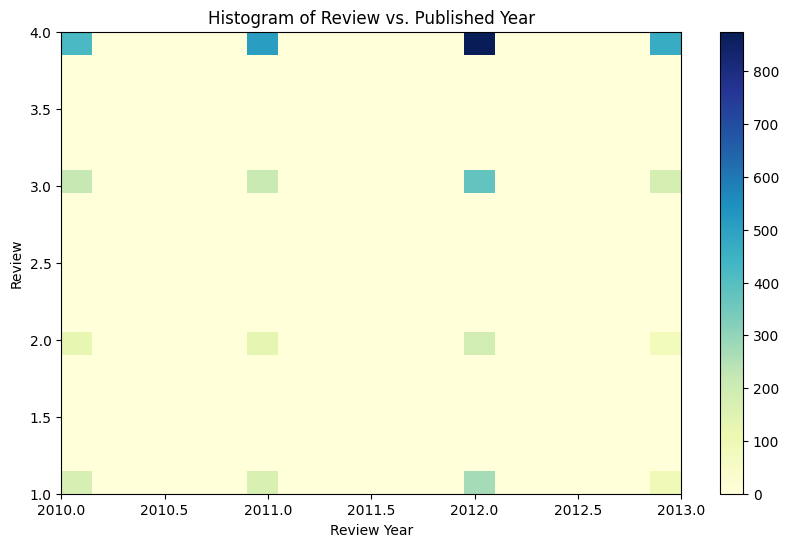

In [147]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[df_train['review'] != 5]['review_year'], df_train[df_train['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

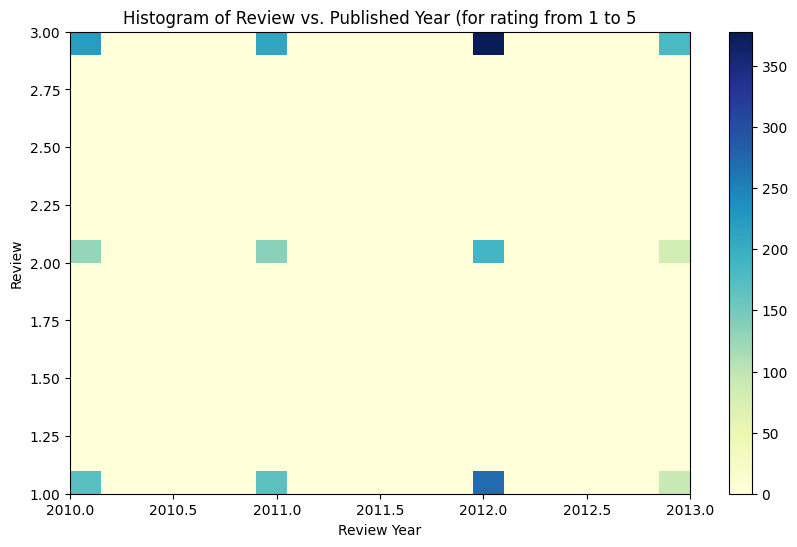

In [148]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[(df_train['review'] != 4) & (df_train['review'] != 5)]['review_year'], df_train[(df_train['review'] != 4) & (df_train['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

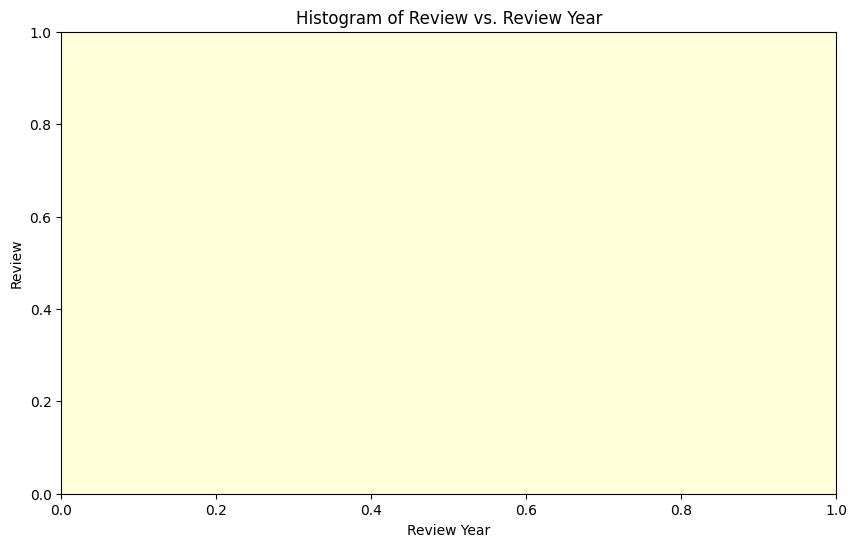

In [149]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[df_train['review_year'] <= 2000]['review_year'], df_train[df_train['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

# Multivariable Analysis

In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 5874 to 12059
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   categories          11568 non-null  object 
 1   publisher           11568 non-null  object 
 2   published_year      11568 non-null  int64  
 3   review_year         11568 non-null  int64  
 4   helpfulness         11568 non-null  float64
 5   text_clean          11568 non-null  object 
 6   compound_sentiment  11568 non-null  float64
 7   review              11568 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 813.4+ KB


In [151]:
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

,published_year,review_year,helpfulness,compound_sentiment,review
published_year,1.000000,0.193703,0.023597,0.025313,0.026600
review_year,0.193703,1.000000,0.199206,0.009507,0.088478
helpfulness,0.023597,0.199206,1.000000,0.129531,0.329972
compound_sentiment,0.025313,0.009507,0.129531,1.000000,0.294729
review,0.026600,0.088478,0.329972,0.294729,1.000000


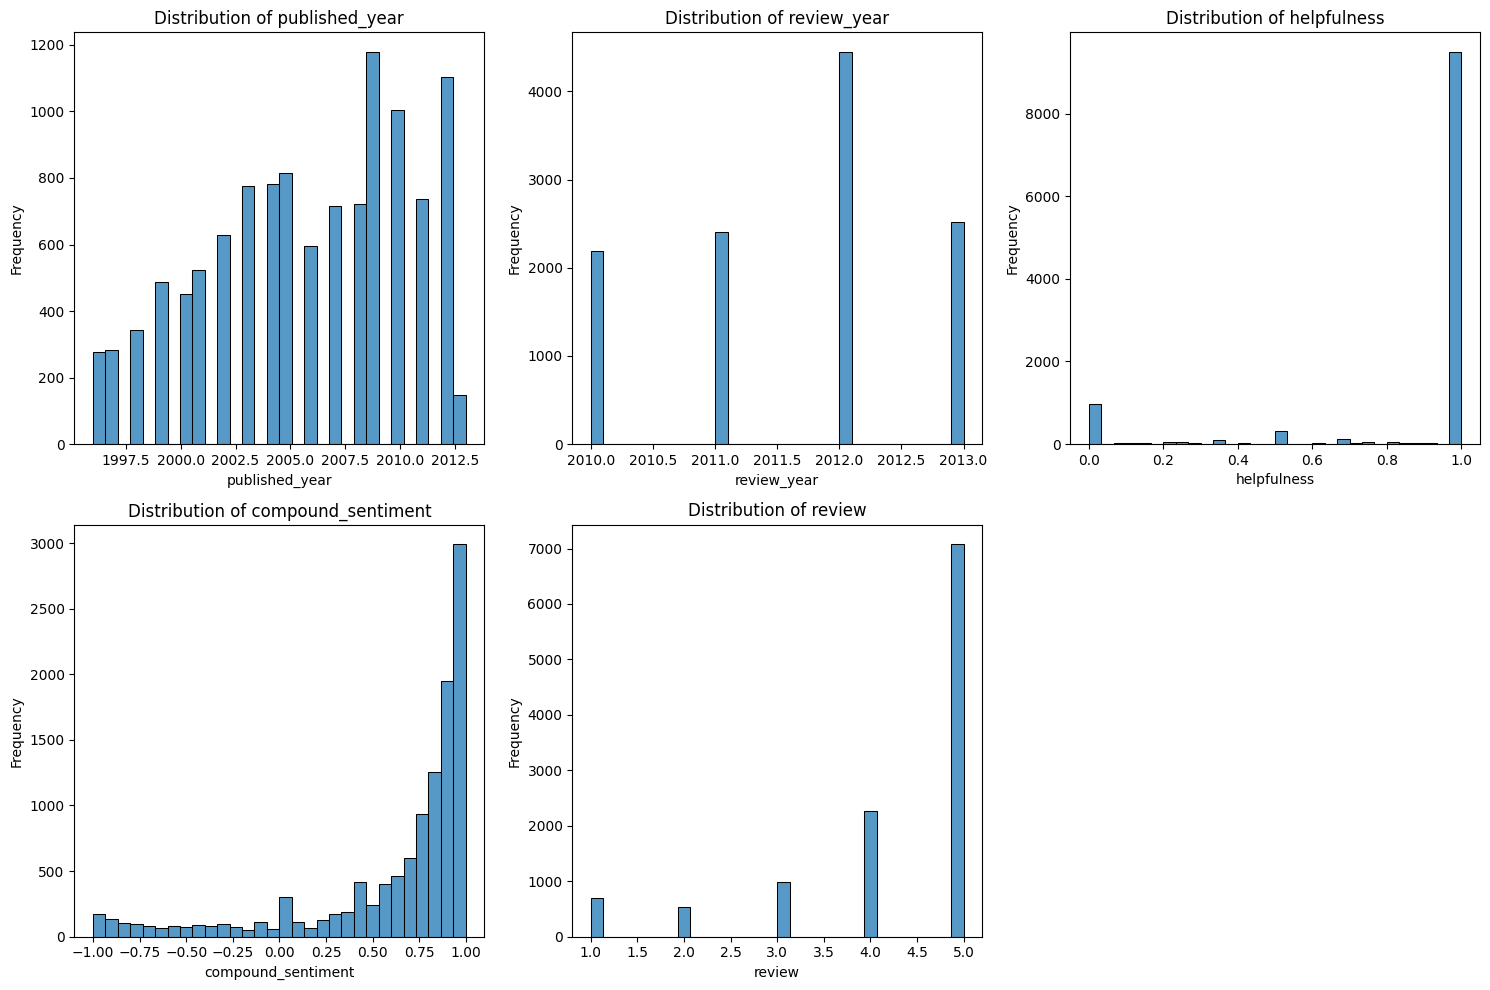

In [152]:


#Histogram with SNS

numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)
    sns.histplot(df_train[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

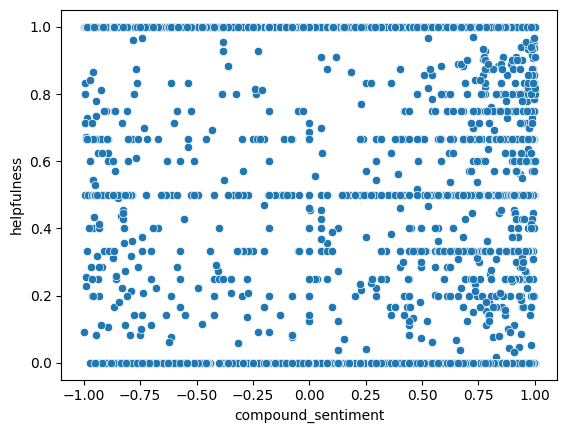

In [153]:
sns.scatterplot(data=df_train, x= 'compound_sentiment', y='helpfulness')
plt.show()

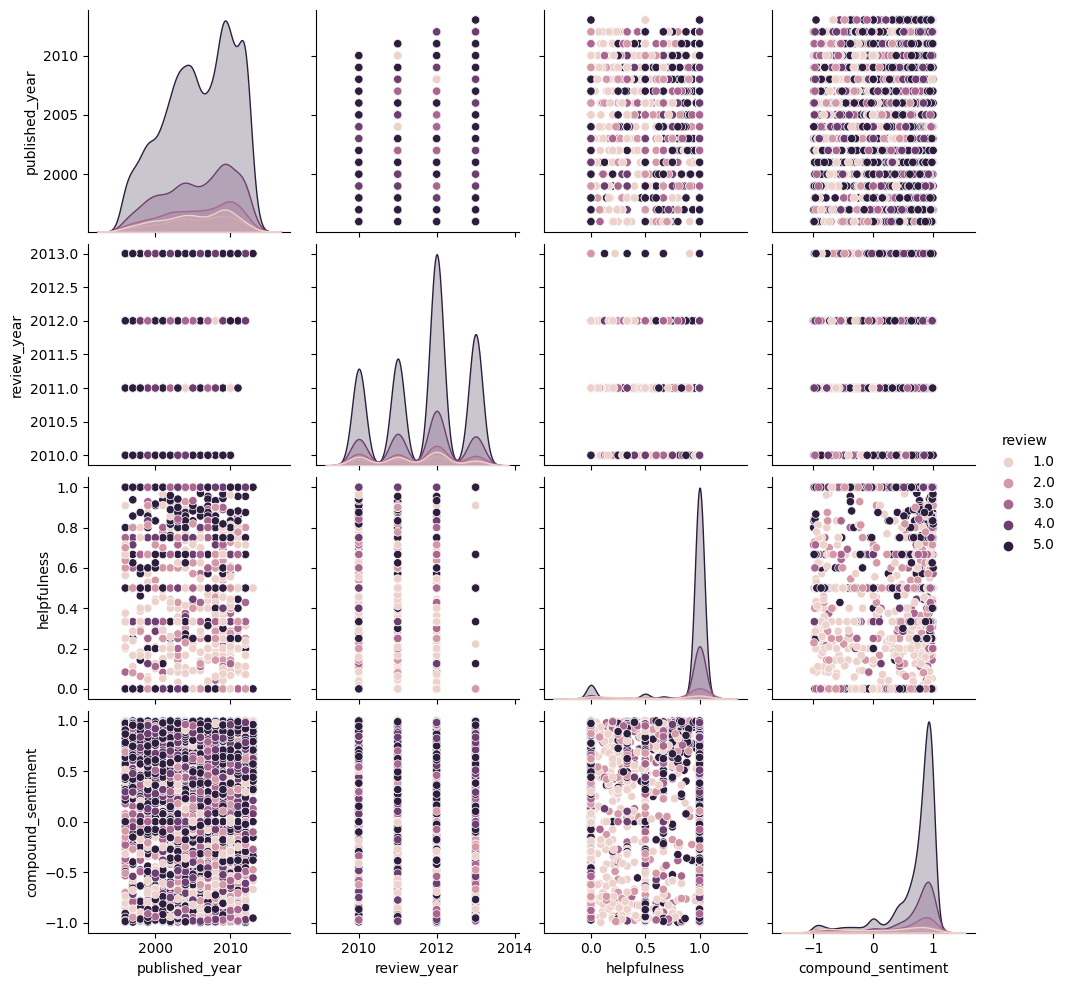

In [154]:
sns.pairplot(data=df_train, hue='review')
plt.show()

# Final Findings from EDA.

- Categorical features Authors, Publisher and Categories are biased to high score values. But have an important variability shown in the countplot figures. So, they will be kept. The model training and testing results with and without using the features, and the crossvalidation will determine if the variables should be removed.


# Model Selection, Training and Testing

- The current project is a regression exercise for predicting a continous value for the Review Score of the Review.
- The dataset contains multiple features. Some of the Categorical which are stored on lists (authors and Categories), a Cateogorical feature Publisher. 
- The dataset contains 4 numerical features, where we have discrete variables (published year, review_year) and continuos variables (helpfulness and compund_sentiment)
- Lastly, the dataset contains a text column that will be vectorized.

- Authors and Categories will be processed with One Hot Encoding, creating a Column for each category in the list. 
- Publisher will be encoded as well

In [114]:
# df_final = df_all_data_processed.copy()

In [115]:
# df_final.sample(10)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
242100,[Other],[Other],Other,2000,2003,1.000000,book quick read apparent put together cinema mind characters thinly developed substance impact storyas reader novels disappointing all however rea...,-0.4939,2.0
481328,[Other],[Other],Other,2004,2008,0.857143,purpose book explain computer models designed simulate human mind perceives music models heavily based lerdahl jackendoffs work preference rules m...,0.2944,3.0
216697,[Other],[Other],Other,1954,2003,0.333333,read farenheit first impression book screwed up mean like would want read book thats wrong one thing like book guys wife mildred liked alot said ...,0.7442,2.0
257663,[Other],[Fiction],Other,2021,2007,0.500000,call work science fiction is technically accurate somewhat disservice book chillingly accurate glimpse future hellish totalitarianism quite amaz...,-0.8979,5.0
51399,[Other],[Other],Other,2004,2008,1.000000,remember reading vague bits whole mess years ago toward end comingapart definitely remember thinking could anybody fooled extent?? ignorance imagi...,0.5204,5.0
22699,[Other],[Other],Other,1993,2008,0.666667,people expecting find straightforward biography surprised lack solid material empress dowager instead dragon lady detailed history book containing...,0.9263,5.0
338255,[Other],[Juvenile Fiction],Other,2011,2000,1.000000,one &quot;big name&quot; reviews site says plot &quot;closely interwoven&quot; great line true marvelous book every single detail come across ties...,0.9899,5.0
49902,[Other],[Fiction],Simon and Schuster,2004,2004,1.000000,first fulllength starfleet corps engineers novel &quot;foundations&quot; story offers something star trek fan enjoys passing time good bookset wit...,0.9971,4.0
28778,[Other],[Juvenile Fiction],Other,2008,2005,1.000000,ive shelf probably since intended audience pages falling cover creased story young woman edges romance selfdiscovery deal grandfathers dying paren...,0.9281,5.0
322789,[Other],[Other],Other,2012,2012,1.000000,thought helpful odd situation lacking something degree spring angle,0.1280,4.0


In [155]:
label_encoder_publisher = LabelEncoder()

In [172]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=1.0)#min_df: Flotante de 0 a 1, Entero: La cuenta. cuantas veces tiene que haber aparecido la palabra para considerarla o eliminar

In [173]:
X_train_text_clean_vec = vectorizer.fit_transform(X_train['text_clean'])

In [174]:
X_train_text_clean_vec.shape

(11568, 10927)

In [176]:
vectorizer.get_feature_names_out()

array(['aa', 'aacute', 'abandon', ..., 'zombies', 'zone', 'zoo'],
      dtype=object)

In [177]:
pca = PCA(n_components=2, random_state=2109)
pca_vecs = pca.fit_transform(X_train_text_clean_vec.toarray())

In [178]:
pca_vecs

array([[ 0.13837707,  0.09161849],
       [ 0.00903598,  0.09891507],
       [-0.02402501,  0.08691279],
       ...,
       [ 0.16376687, -0.09609824],
       [-0.0802378 , -0.06562191],
       [ 0.09105338,  0.00428933]])

In [117]:
# df_final.shape

(502038, 9)

In [156]:
#Publisher 
# df_final['publisher_Label'] = label_encoder_publisher.fit_transform(df_final['publisher'])
# df_final = df_final.drop(['publisher'], axis=1)
# df_final.sample(5)

In [157]:
# df_final = df_final.explode('authors')
# df_final.info()

In [158]:
# df_final.reset_index(drop=True, inplace=True)
# df_final.info()

In [159]:
# df_final = df_final.explode('categories')
# df_final.info()

In [160]:
# df_final.reset_index(drop=True, inplace=True)
# df_final.info()

In [123]:
# label_encoder_author = LabelEncoder()

In [161]:
# #Publisher 
# df_final['author_Label'] = label_encoder_author.fit_transform(df_final['authors'])
# df_final = df_final.drop(['authors'], axis=1)
# df_final.sample(5)

In [125]:
# label_encoder_category = LabelEncoder()

In [162]:
# df_final['category_Label'] = label_encoder_category.fit_transform(df_final['categories'])
# df_final = df_final.drop(['categories'], axis=1)
# df_final.sample(5)

In [171]:
# df_final.isna().sum()

In [170]:
# df_final.shape

In [169]:
# df_final = df_final.dropna(how='any')
# df_final.shape

In [168]:
# # df_final.isna().sum()

In [164]:
# #Divide Data Set into Train Test Datasets
# X = df_final.copy().drop(['review'], axis=1)
# y = df_final['review'].copy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1530) #stratify: para definir los datasets de forma proporcional acorde a y.

# X_train.sample(5)

In [163]:
# X_train.isna().sum()

In [165]:
# vec_model = CountVectorizer(stop_words = "english")

In [166]:
# X_train['text_clean'] = vec_model.fit_transform(X_train['text_clean'] ).toarray()

In [167]:
# X_test = vec_model.transform(X_test).toarray()

In [267]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=1.0)#min_df: Flotante de 0 a 1, Entero: La cuenta. cuantas veces tiene que haber aparecido la palabra para considerarla o eliminar

In [268]:
# X_train_text_clean_vec = vectorizer.fit_transform(X_train['text_clean'])

In [269]:
# X_train_text_clean_vec.shape

(377253, 93901)

In [270]:
# vectorizer.get_feature_names_out()

array(['__', '___', '____', ..., 'zx', 'zygote', 'zz'], dtype=object)

In [271]:
# vectorizer.get_feature_names_out().shape

(93901,)

In [273]:
# pca = PCA(n_components=2, random_state=2109)
# pca_vecs = pca.fit_transform(X_train_text_clean_vec.toarray())

MemoryError: Unable to allocate 264. GiB for an array with shape (377253, 93901) and data type float64

Apply scaler to years?

Add all preprocessing to Pipeline

In [ ]:
# #Publisher 
# df_final['authors_Label'] = df_final['authors'].astype('category').cat.codes
# df_final = df_final.drop(['publisher'], axis=1)
# df_final.sample(5)

In [195]:
# authors_dummies = pd.get_dummies(df_final['authors'].explode(), prefix='Author', drop_first=True)
# authors_dummies.head(10)

Alta Cardinalidad de algunas variables
Top 10 de los autores es menos del 10% o 5%
Ya no es necesario hacer el explode.